# Disease Prediction based on Symtoms

In [44]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [7]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# !pip install jcopml

,missing_value,%
itching,0,0.0
skin_rash,0,0.0
nodal_skin_eruptions,0,0.0
continuous_sneezing,0,0.0
shivering,0,0.0
...,...,...
inflammatory_nails,0,0.0
blister,0,0.0
red_sore_around_nose,0,0.0
yellow_crust_ooze,0,0.0


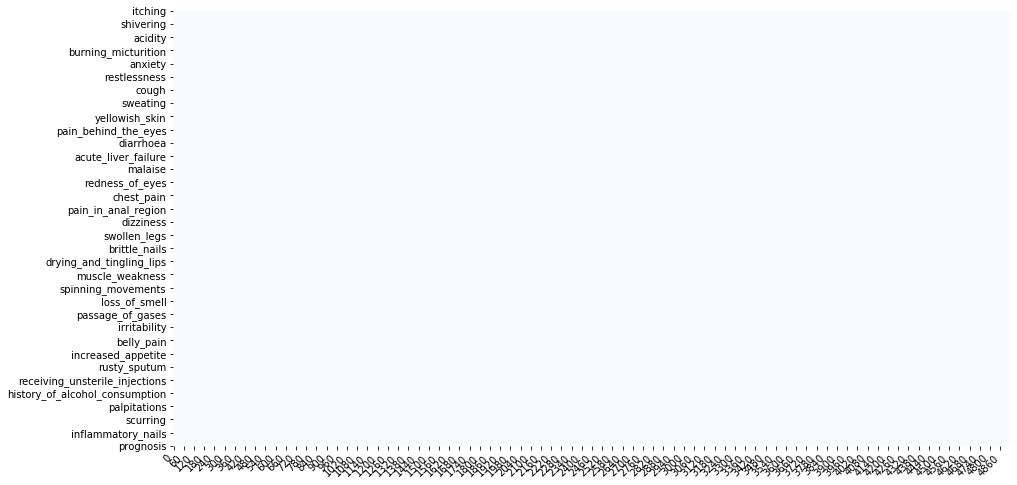

In [8]:
# Plot Missing Value
from jcopml.plot import plot_missing_value
plot_missing_value(df, return_df = True)

In [9]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


itching


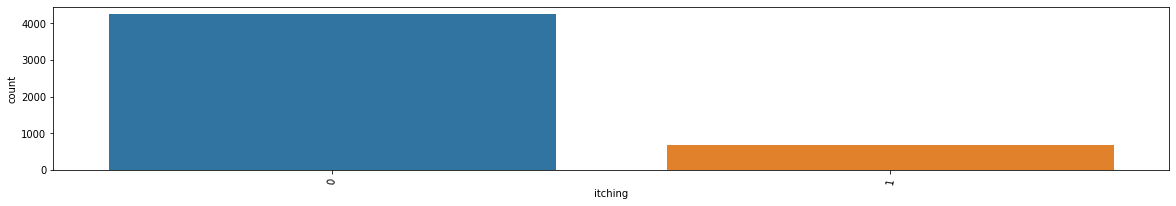

skin_rash


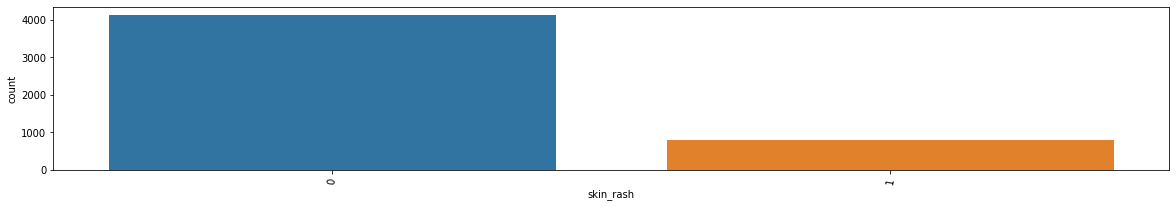

nodal_skin_eruptions


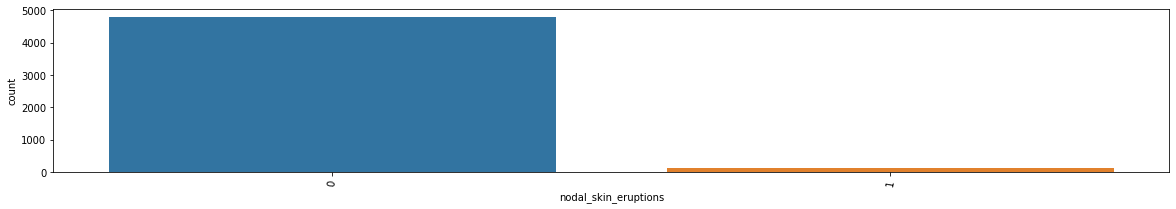

continuous_sneezing


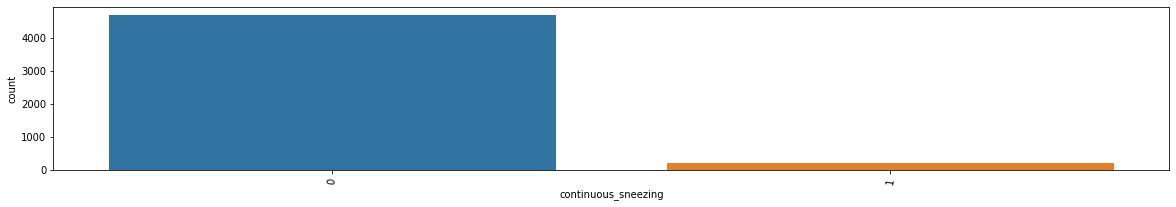

shivering


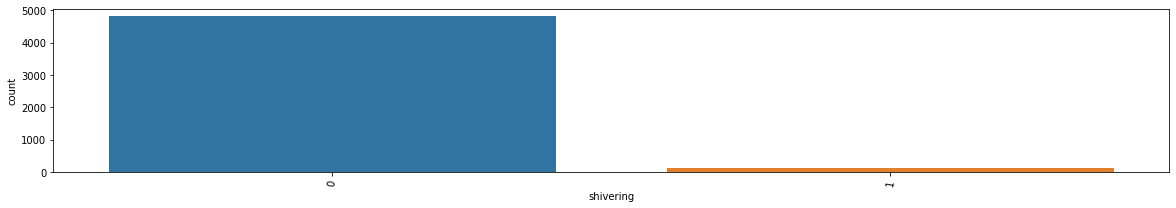

chills


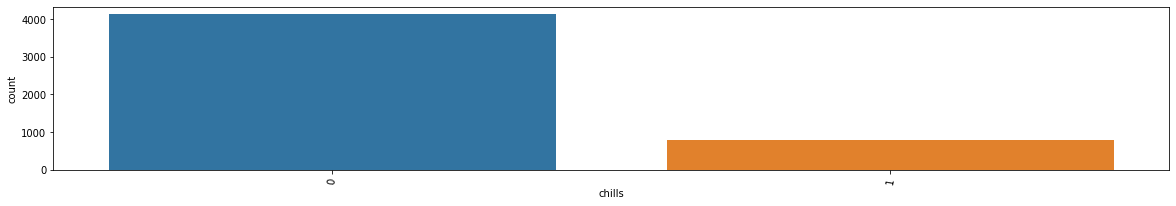

joint_pain


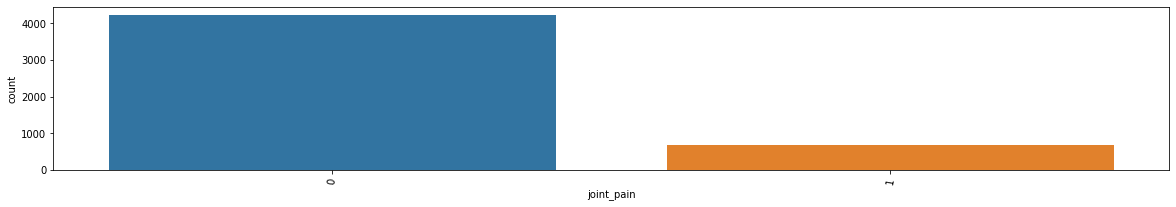

stomach_pain


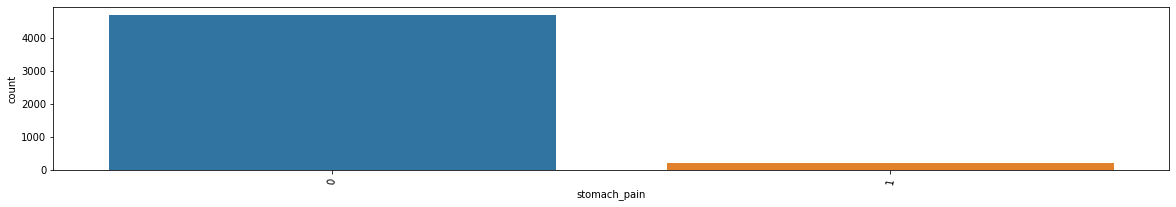

acidity


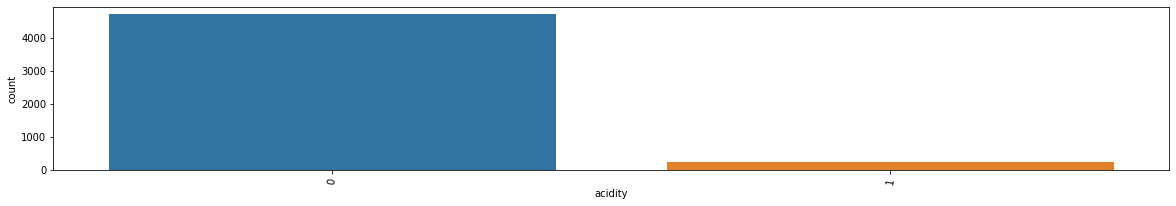

ulcers_on_tongue


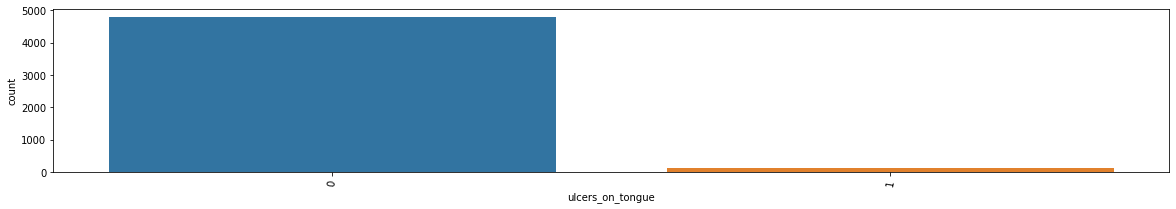

muscle_wasting


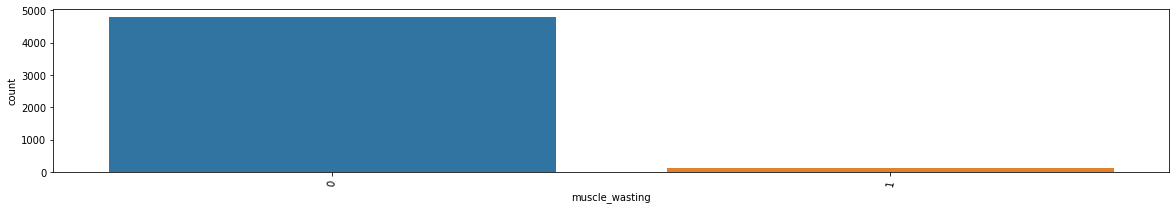

vomiting


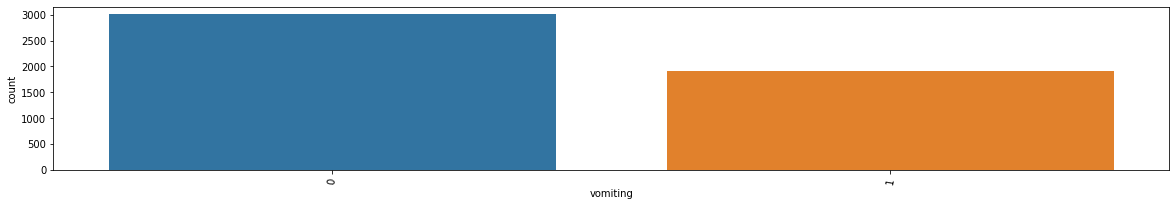

burning_micturition


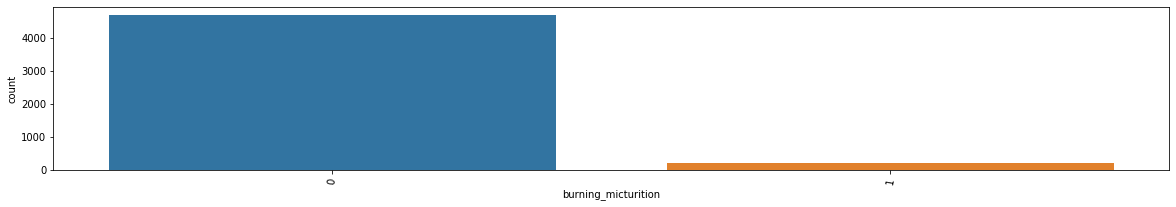

spotting_ urination


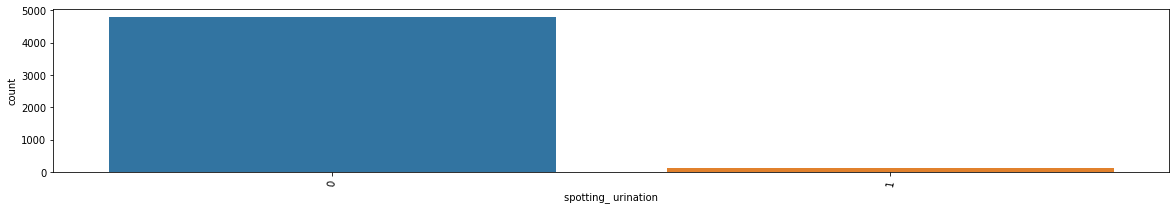

fatigue


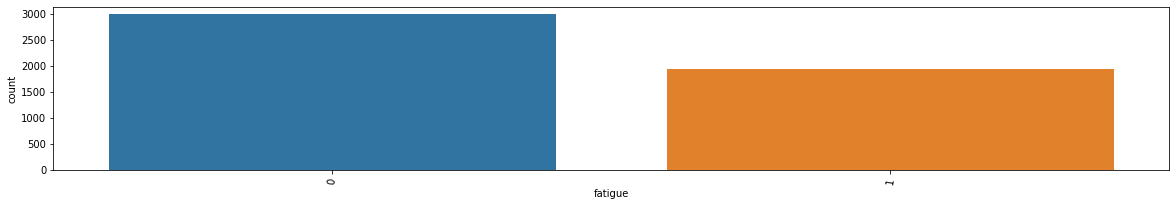

weight_gain


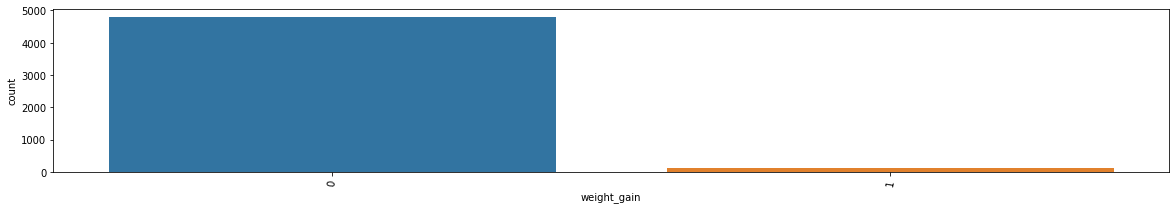

anxiety


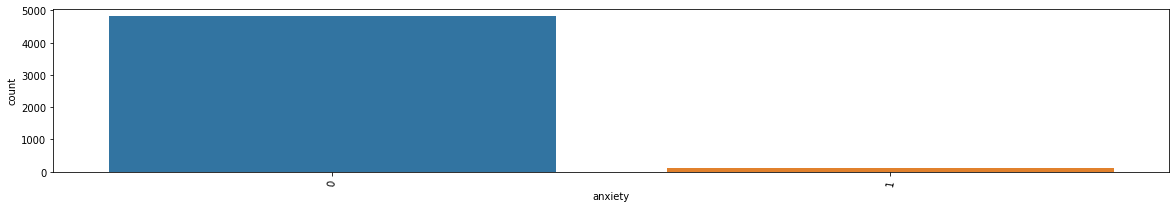

cold_hands_and_feets


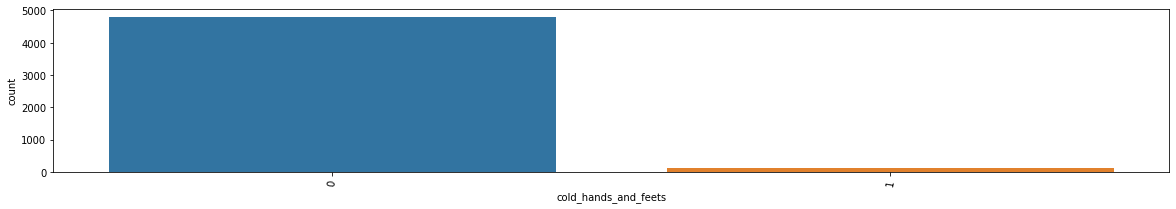

mood_swings


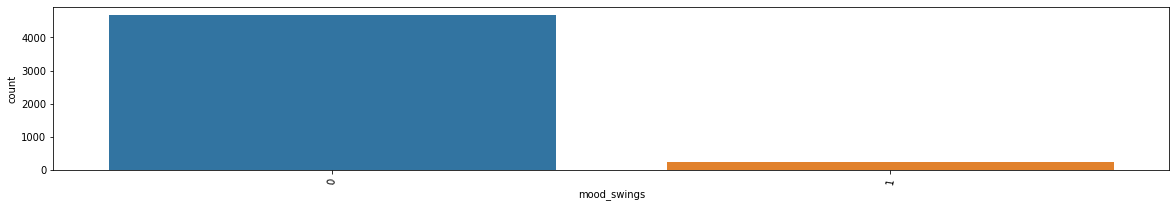

weight_loss


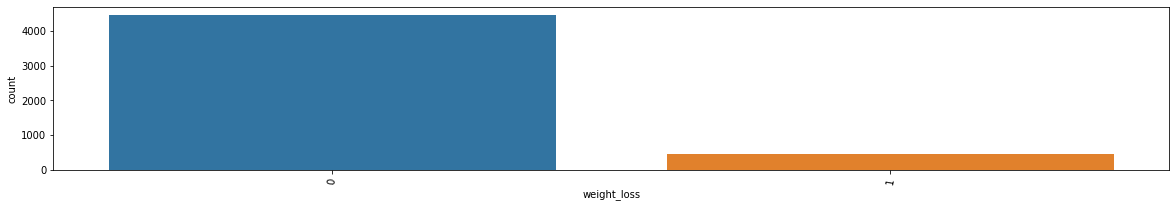

restlessness


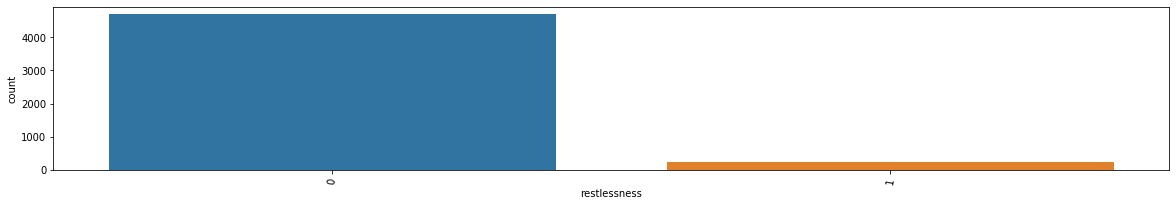

lethargy


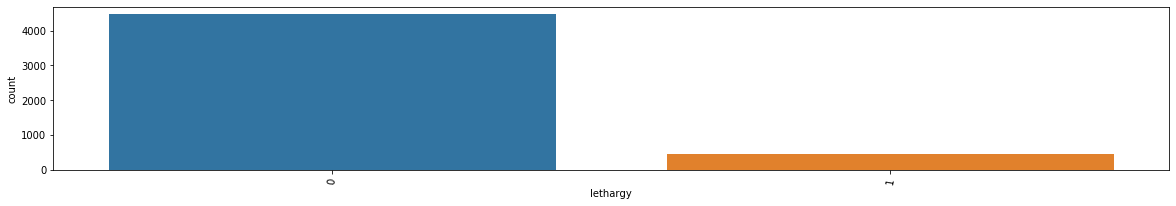

patches_in_throat


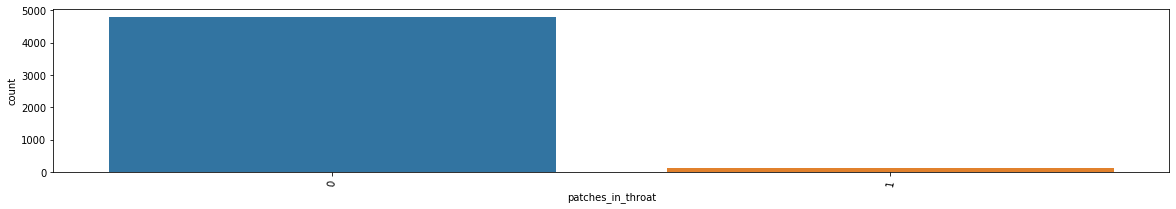

irregular_sugar_level


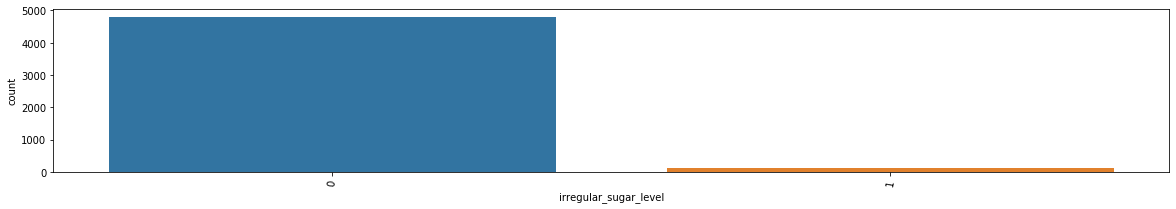

cough


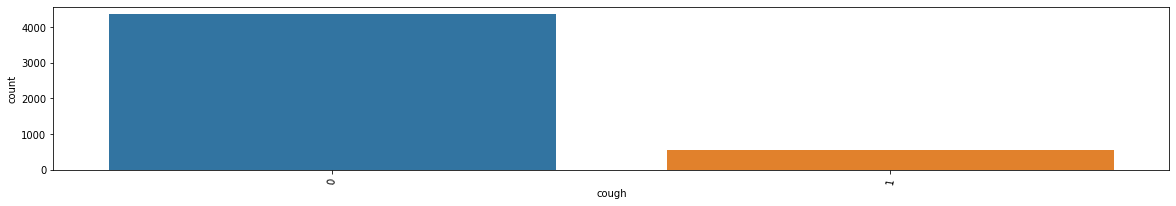

high_fever


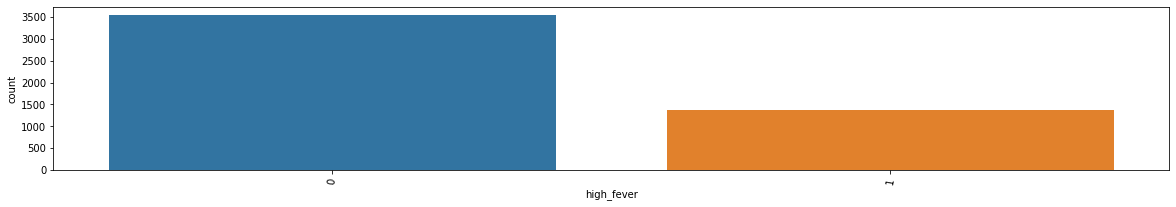

sunken_eyes


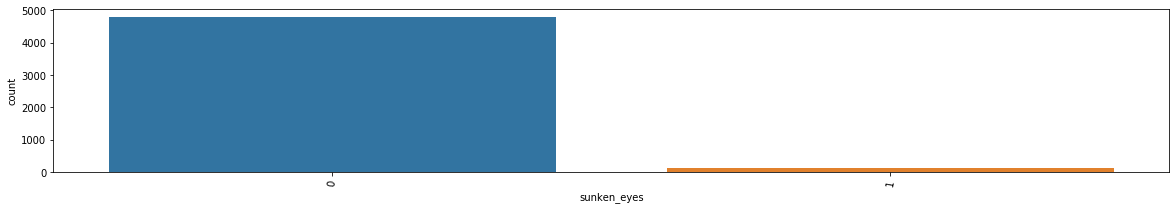

breathlessness


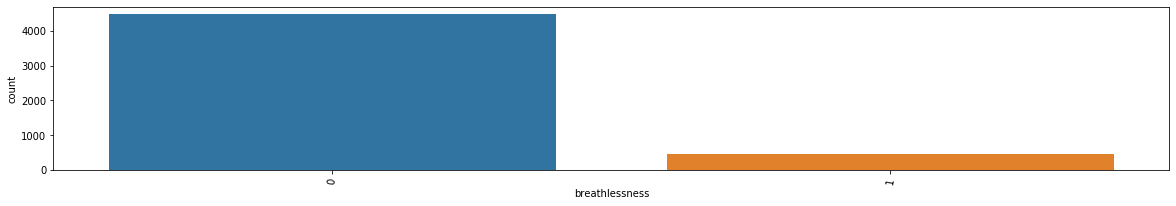

sweating


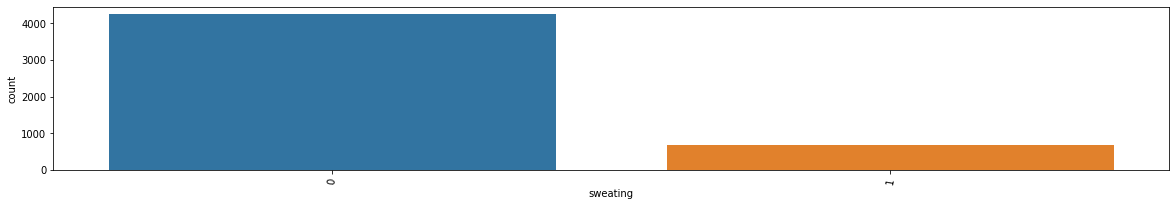

dehydration


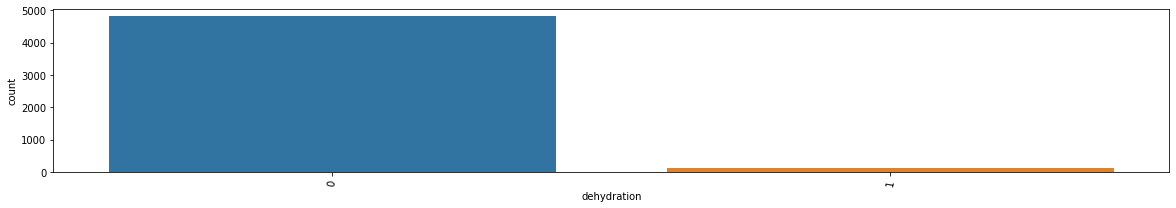

indigestion


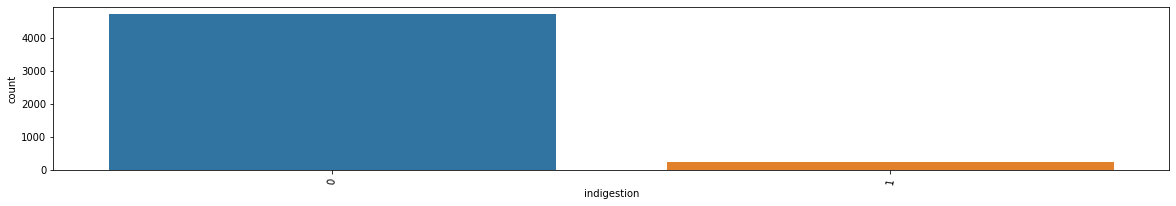

headache


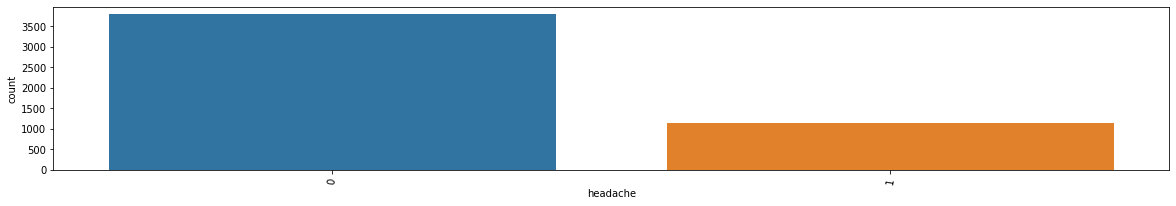

yellowish_skin


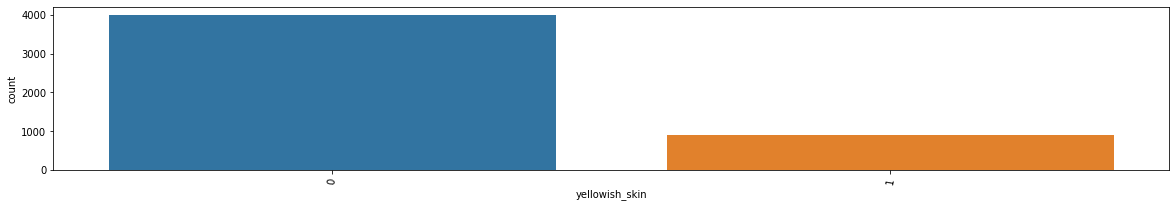

dark_urine


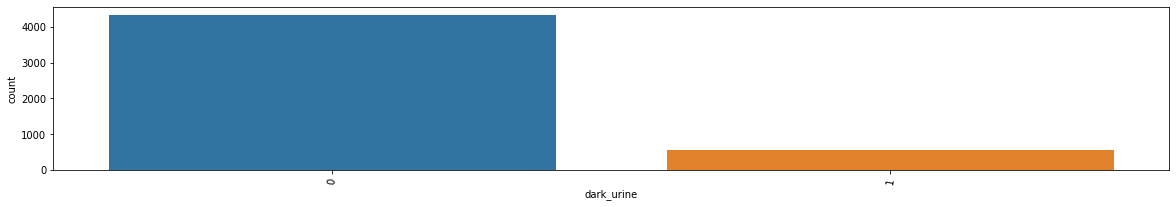

nausea


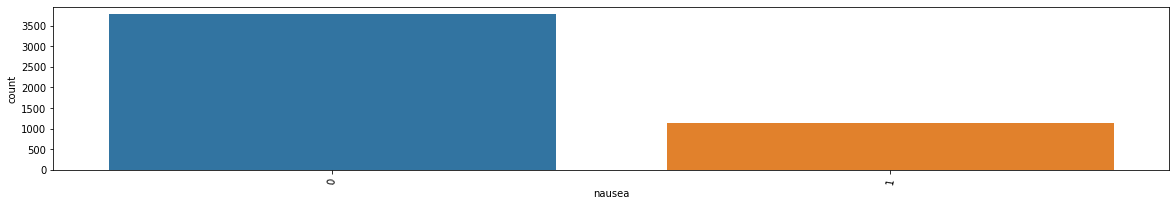

loss_of_appetite


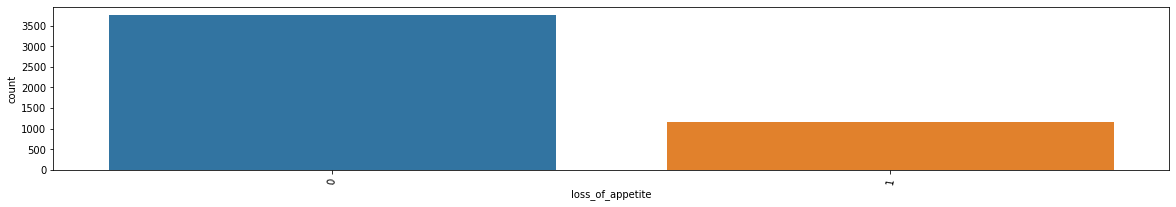

pain_behind_the_eyes


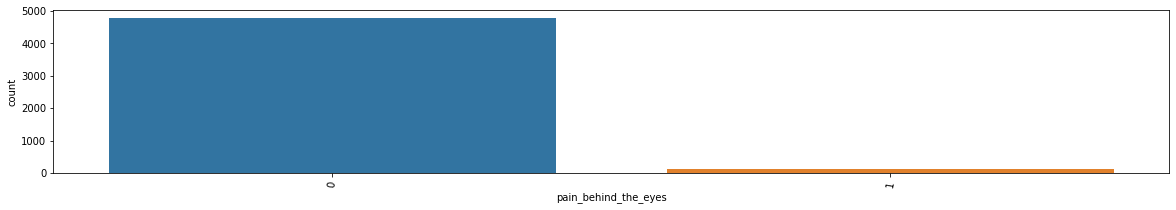

back_pain


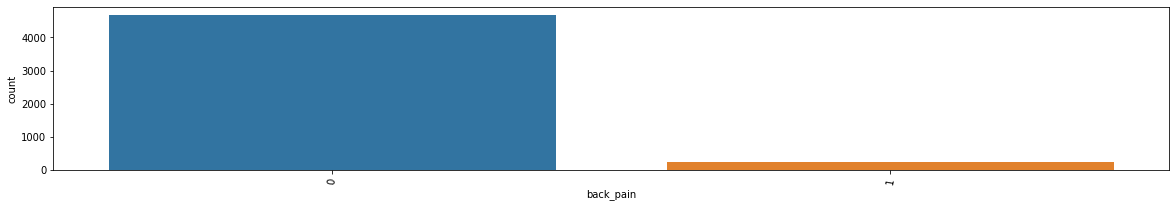

constipation


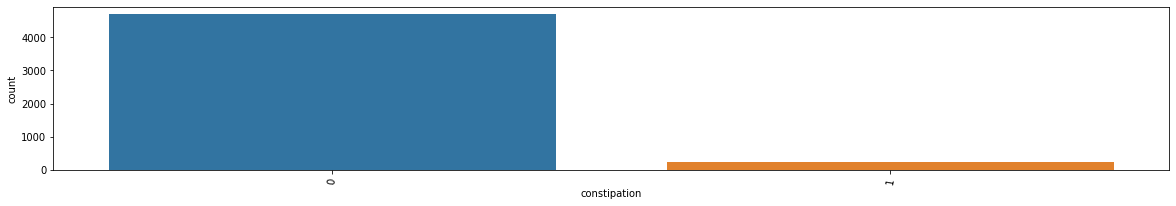

abdominal_pain


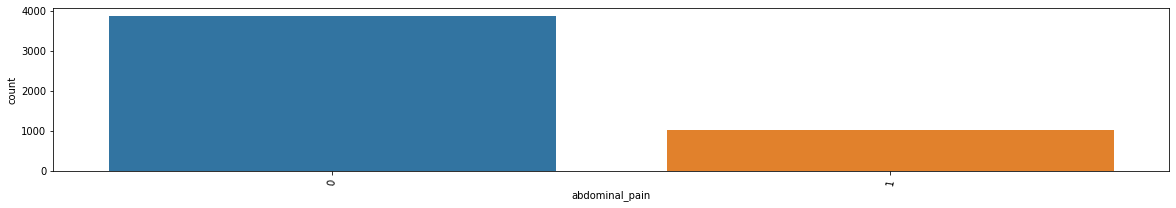

diarrhoea


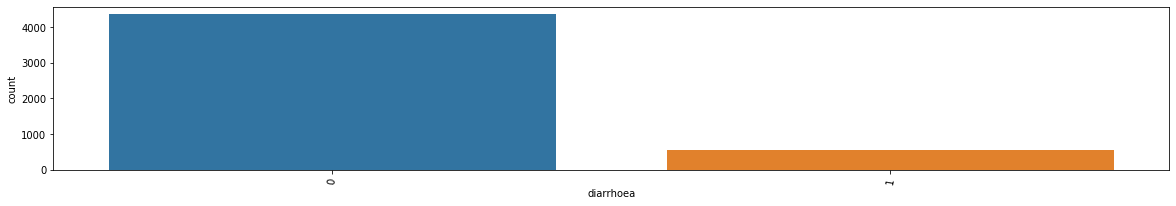

mild_fever


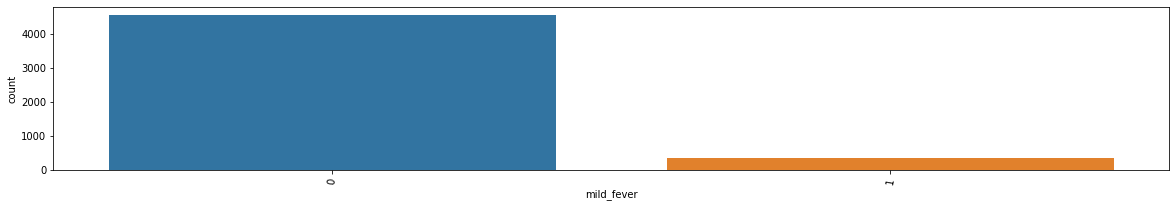

yellow_urine


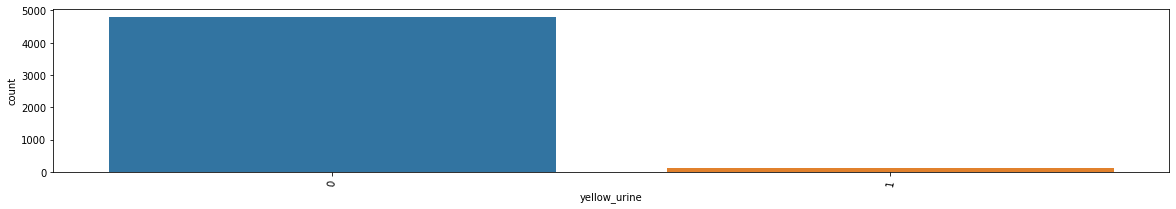

yellowing_of_eyes


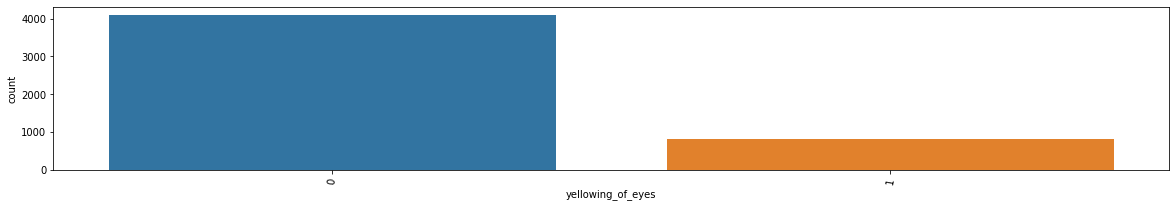

acute_liver_failure


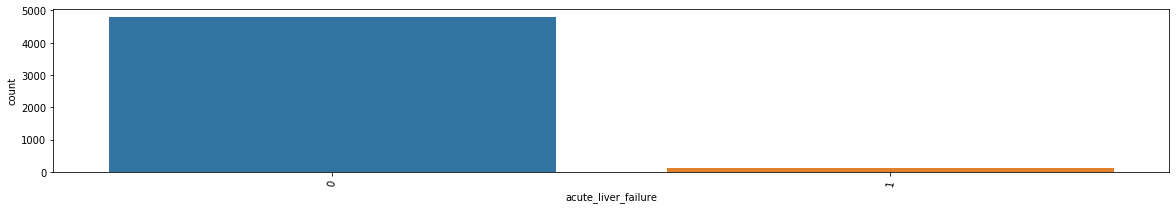

fluid_overload


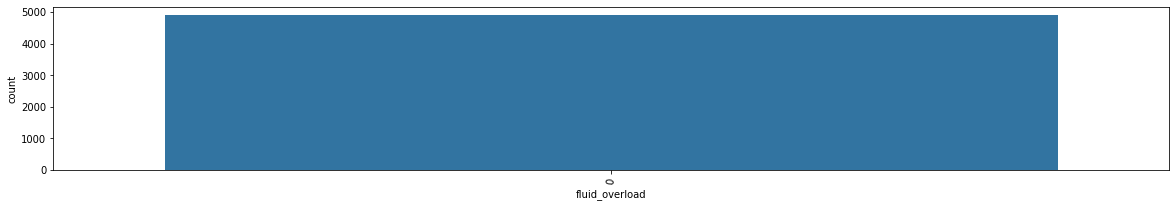

swelling_of_stomach


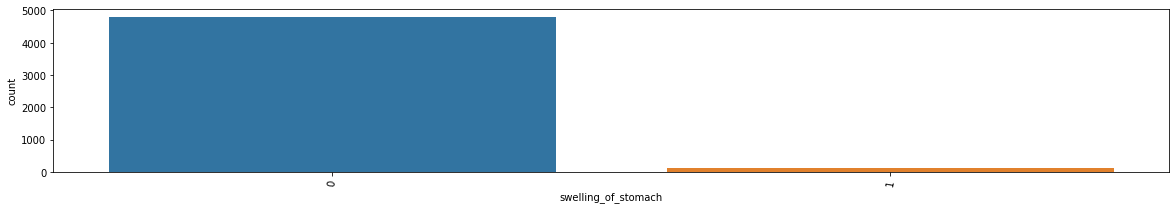

swelled_lymph_nodes


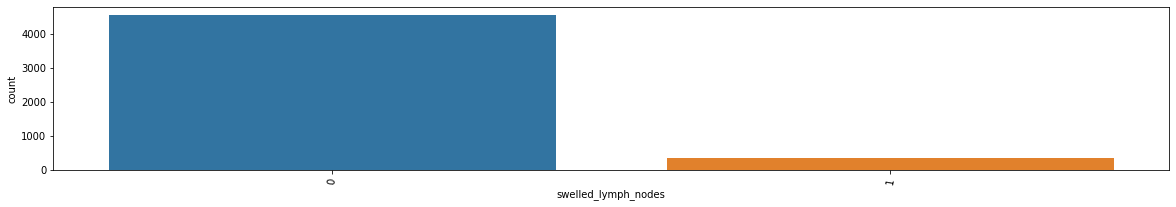

malaise


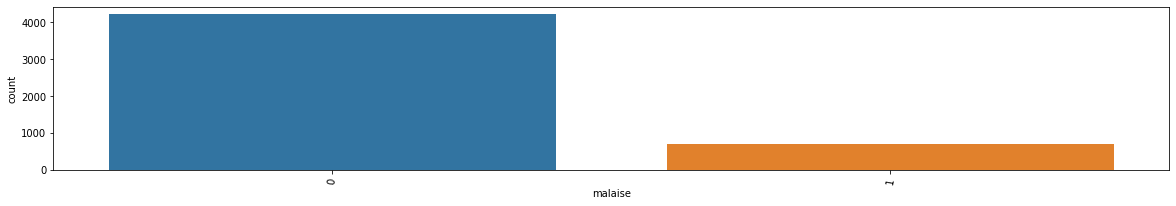

blurred_and_distorted_vision


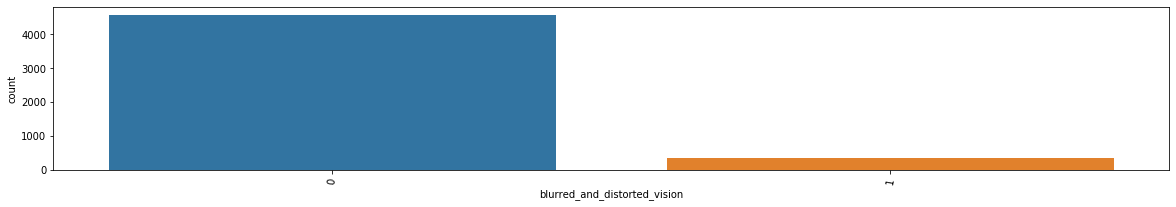

phlegm


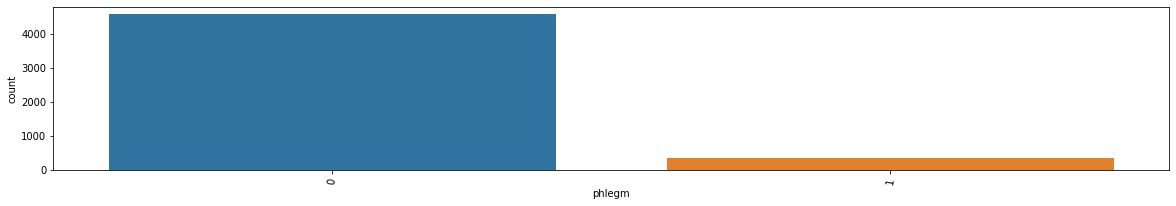

throat_irritation


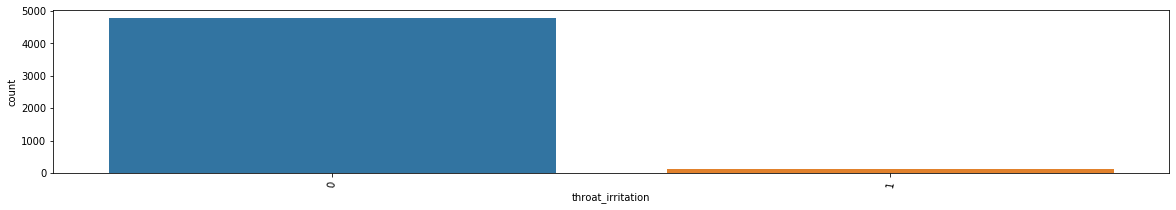

redness_of_eyes


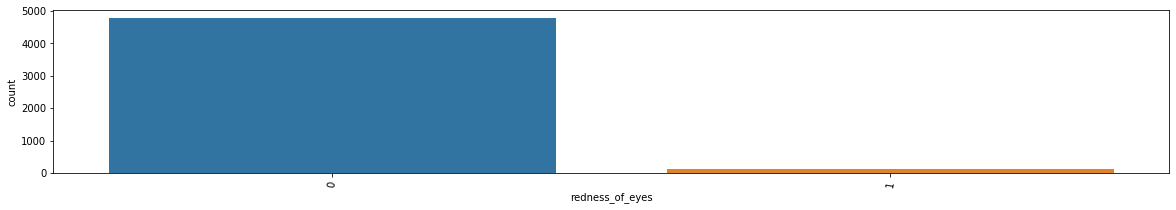

sinus_pressure


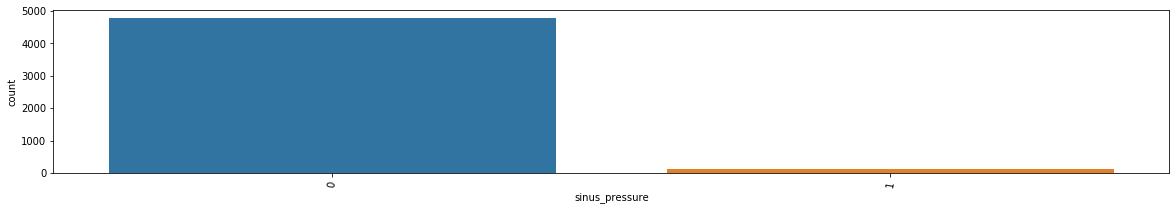

runny_nose


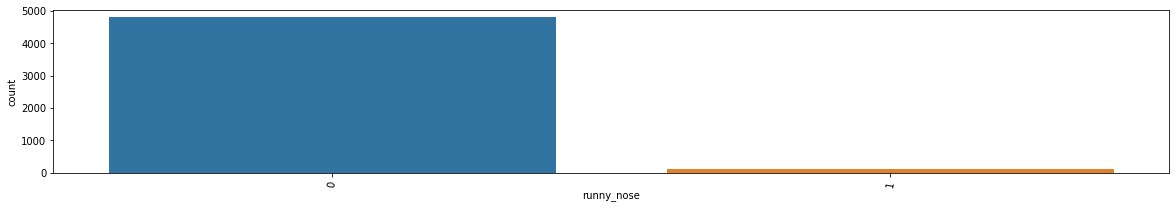

congestion


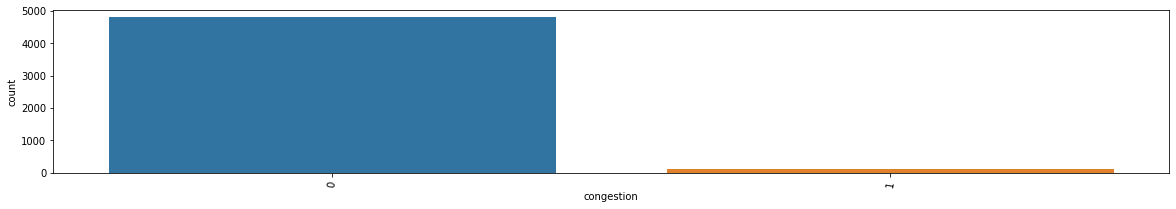

chest_pain


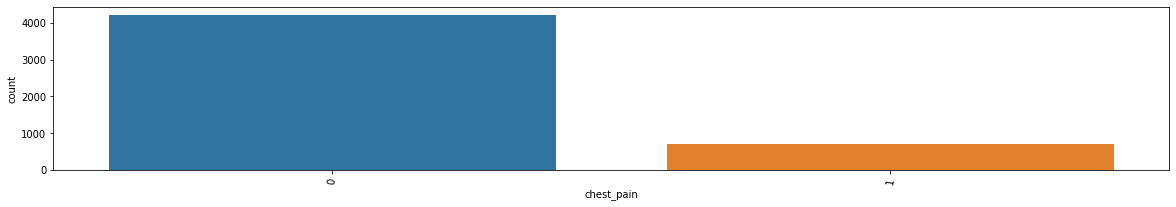

weakness_in_limbs


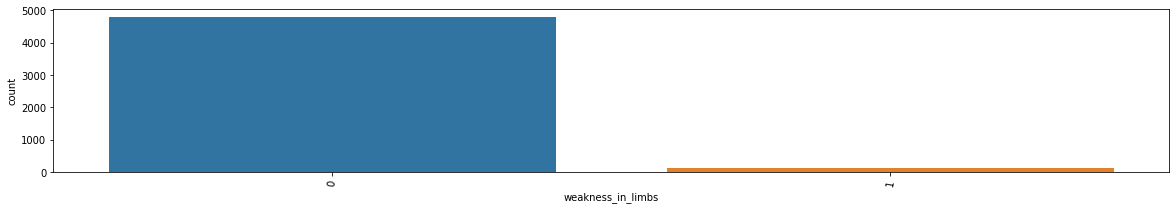

fast_heart_rate


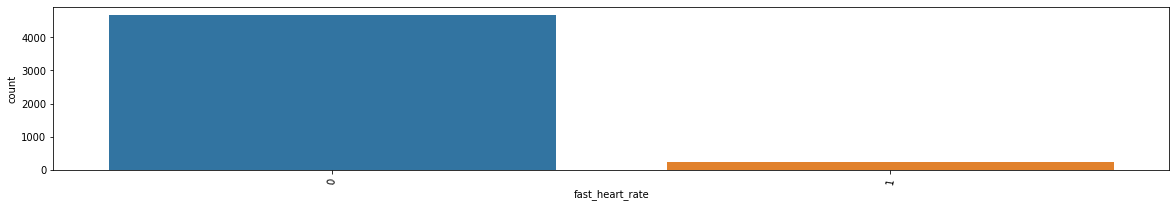

pain_during_bowel_movements


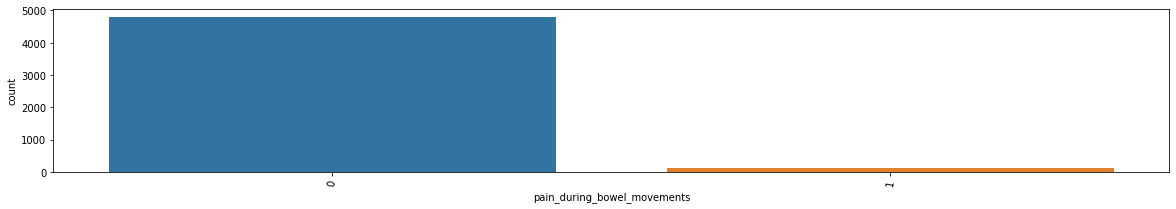

pain_in_anal_region


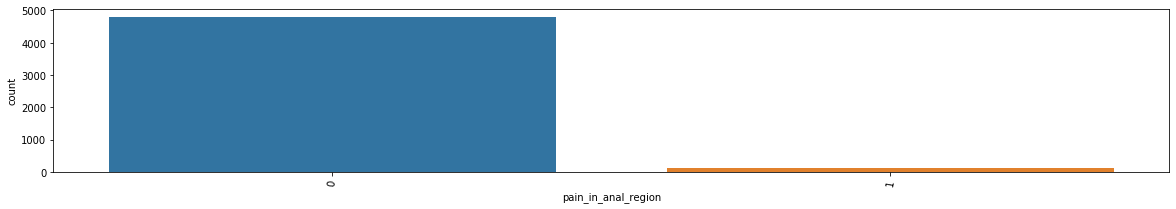

bloody_stool


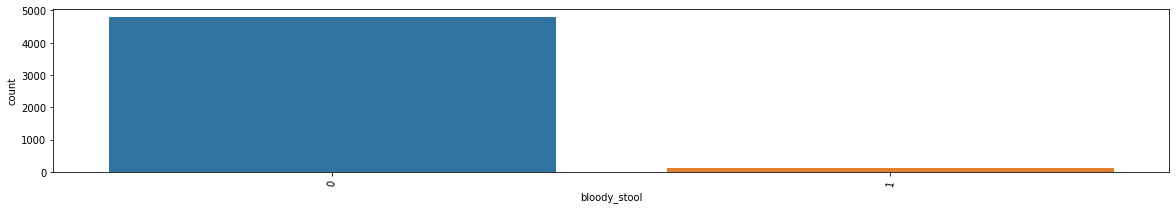

irritation_in_anus


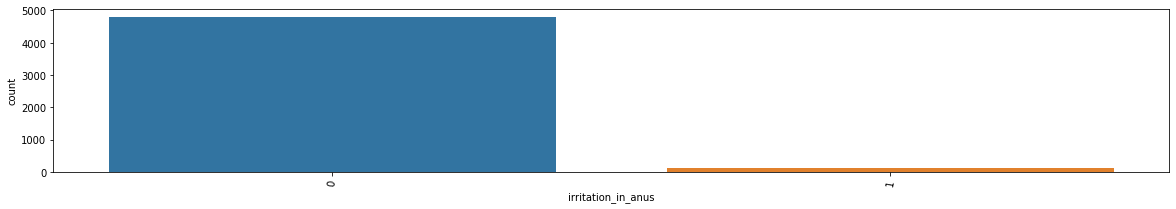

neck_pain


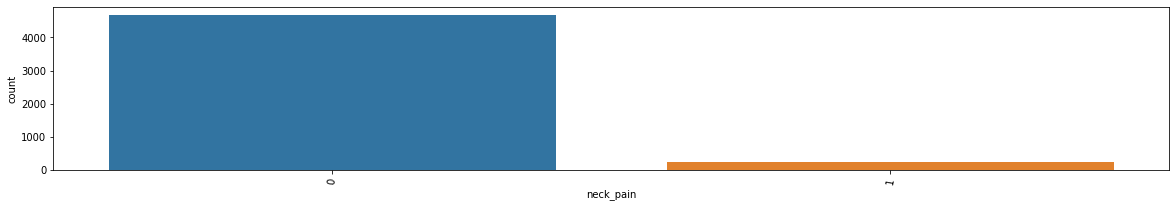

dizziness


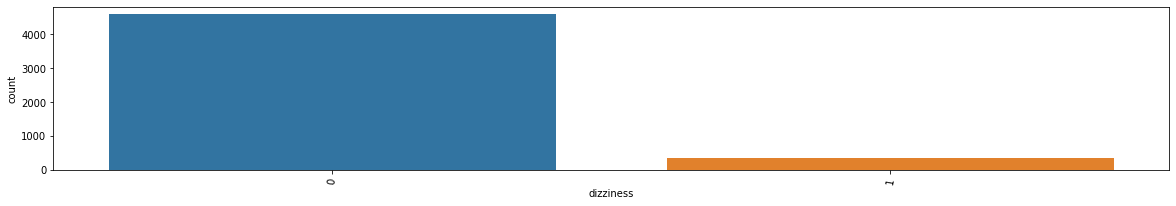

cramps


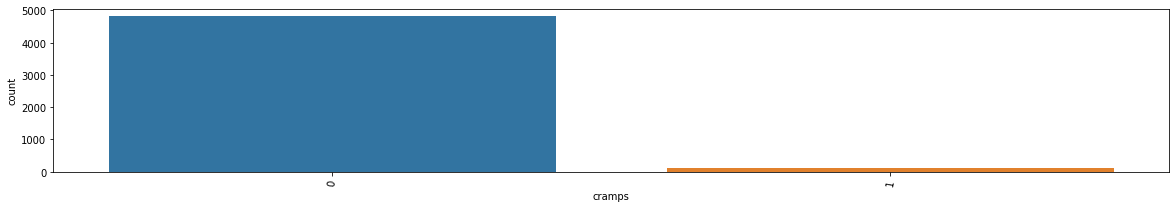

bruising


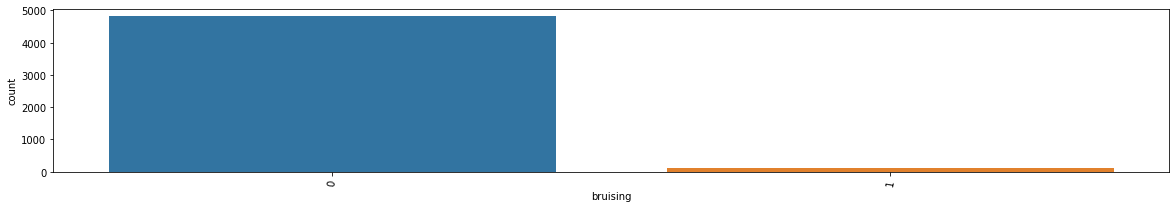

obesity


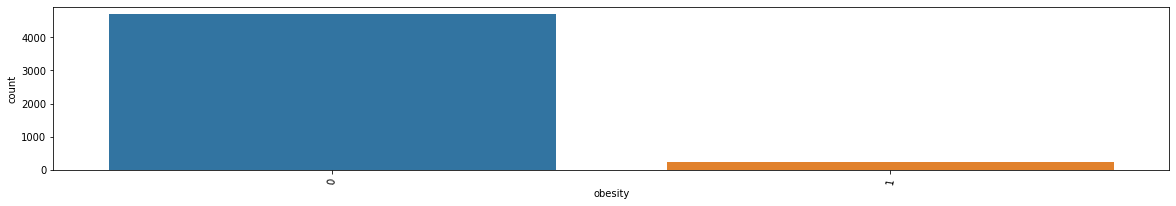

swollen_legs


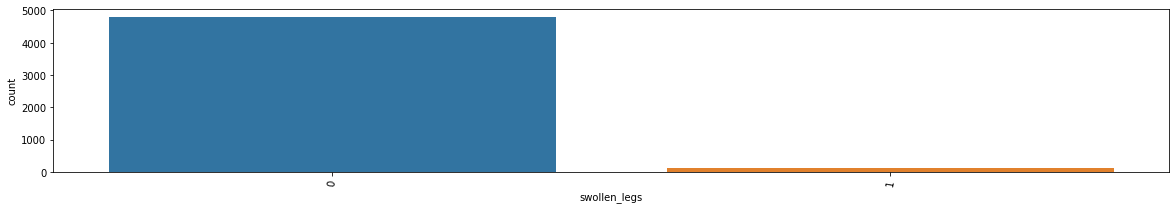

swollen_blood_vessels


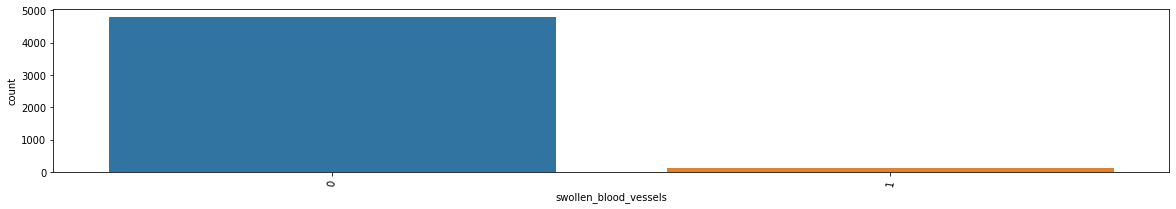

puffy_face_and_eyes


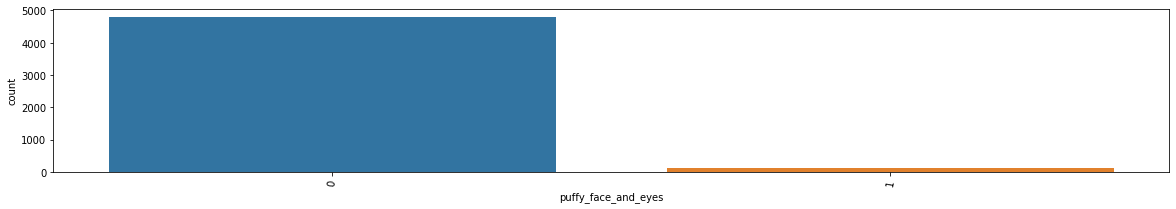

enlarged_thyroid


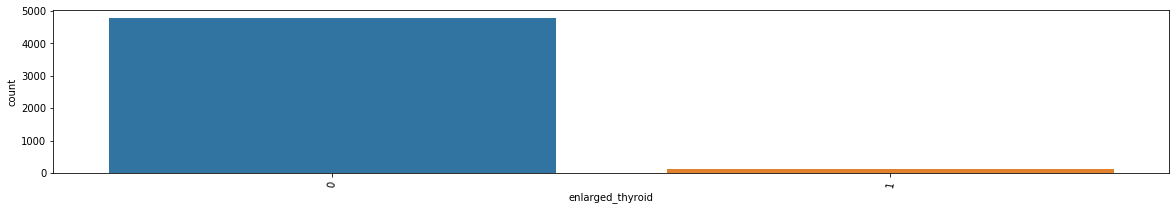

brittle_nails


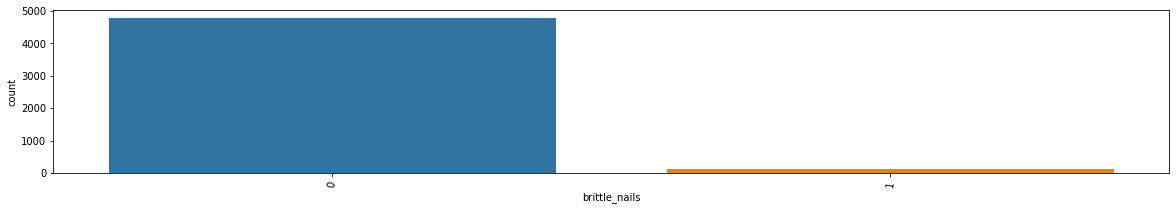

swollen_extremeties


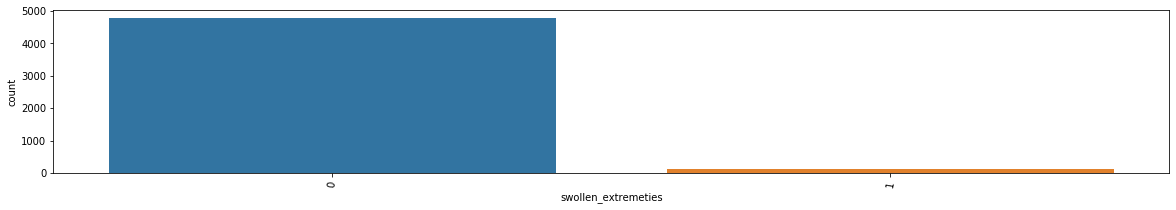

excessive_hunger


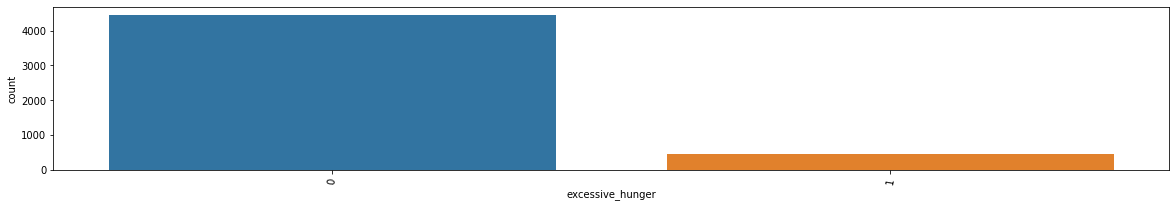

extra_marital_contacts


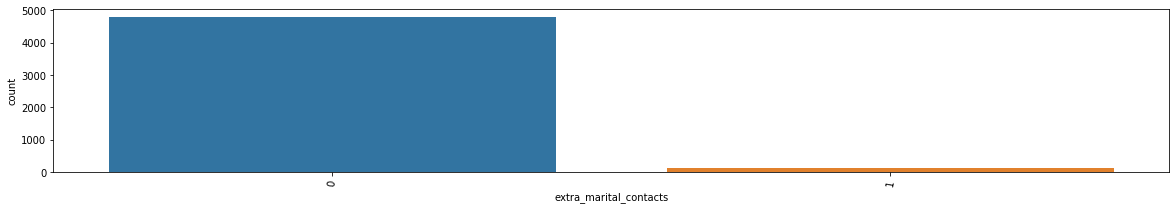

drying_and_tingling_lips


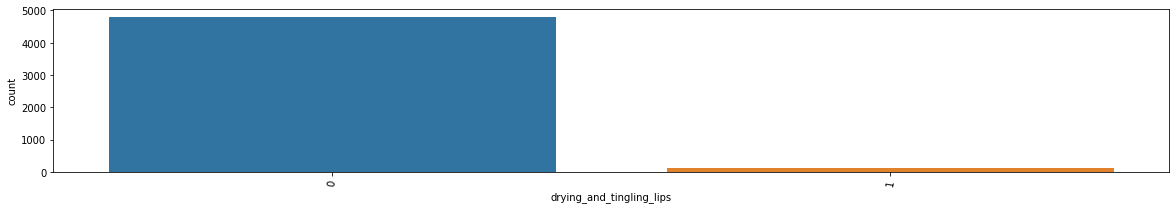

slurred_speech


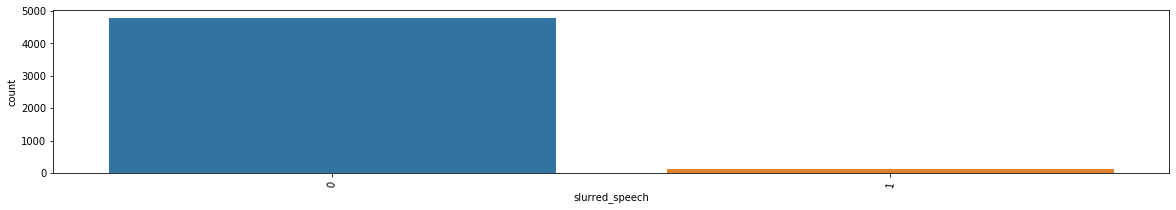

knee_pain


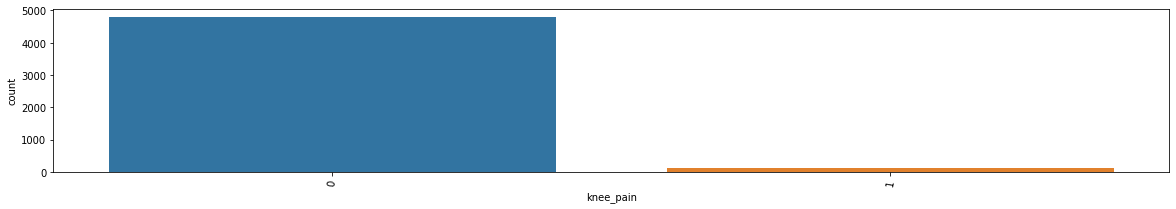

hip_joint_pain


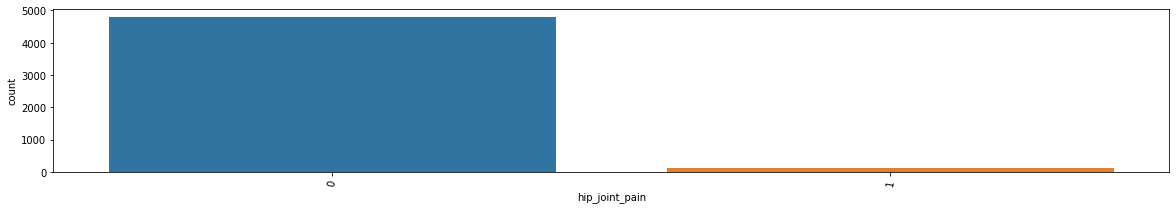

muscle_weakness


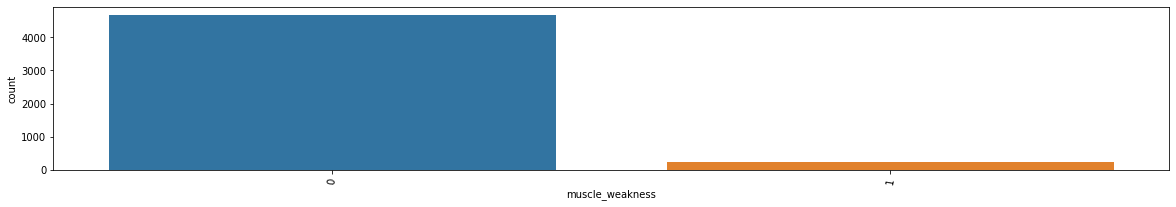

stiff_neck


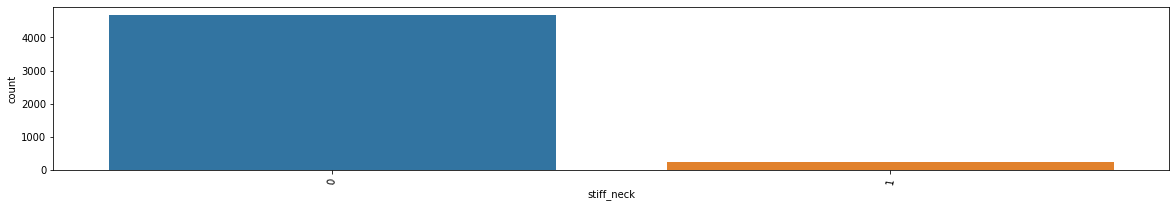

swelling_joints


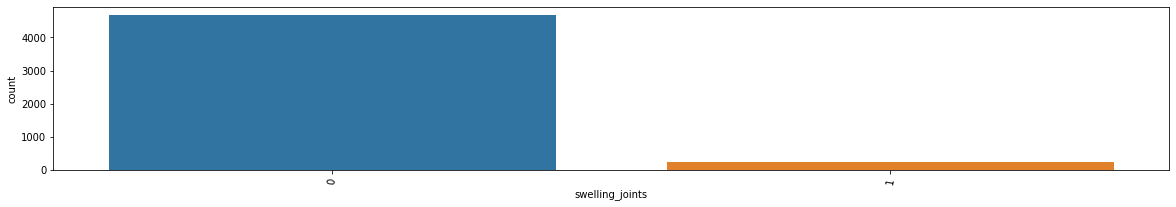

movement_stiffness


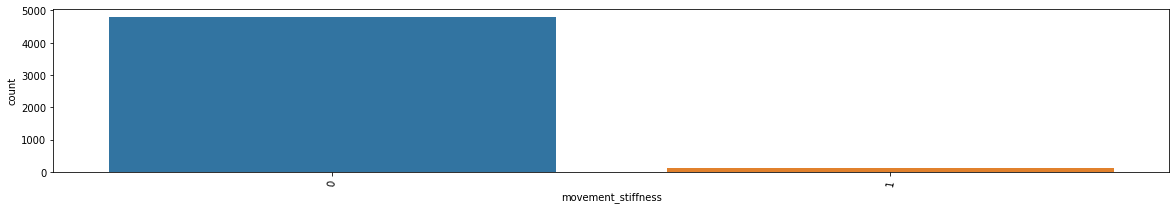

spinning_movements


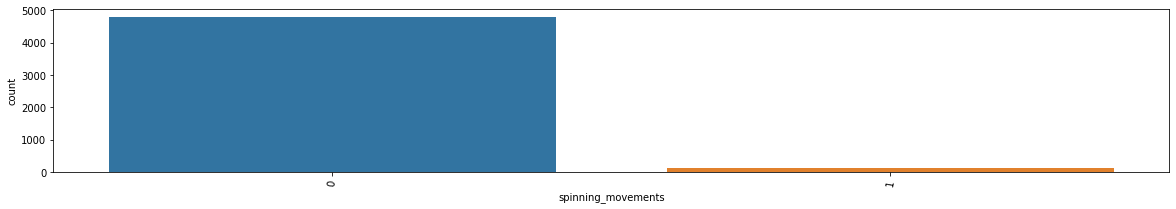

loss_of_balance


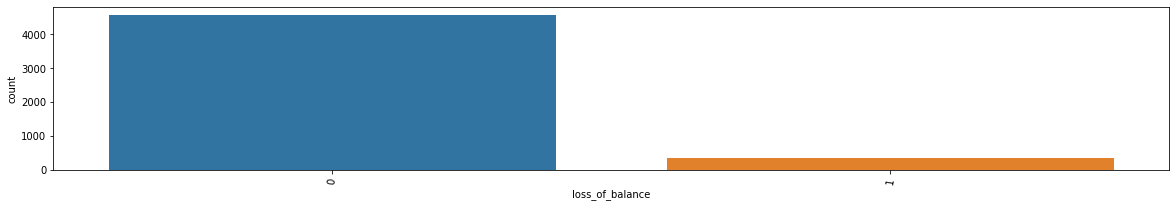

unsteadiness


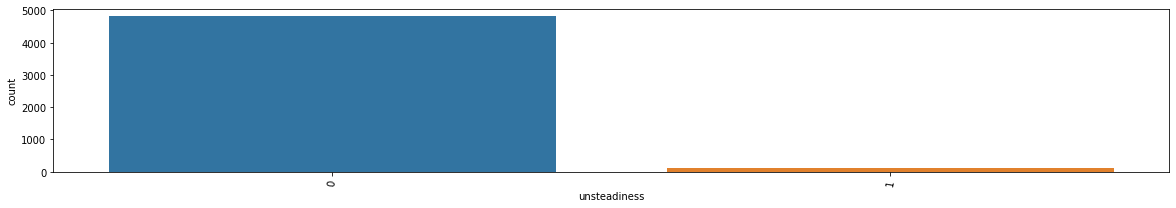

weakness_of_one_body_side


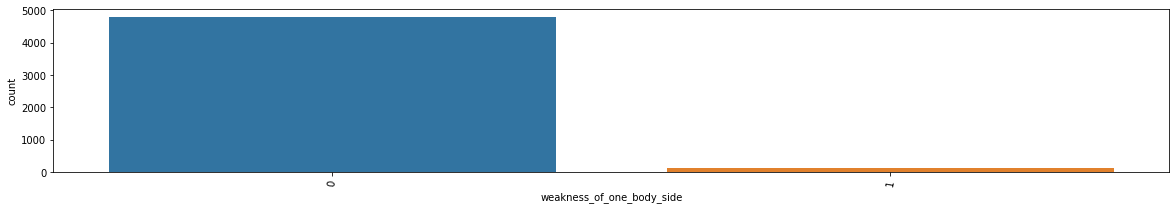

loss_of_smell


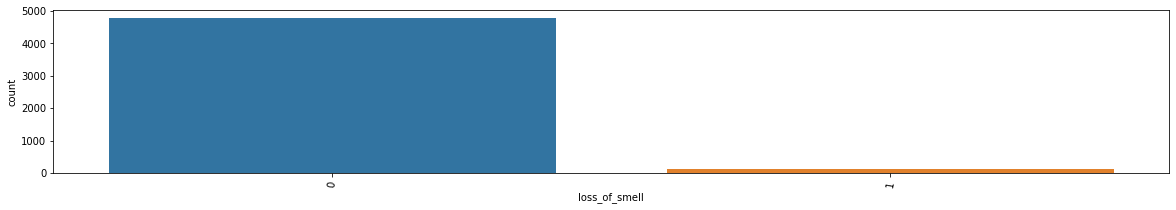

bladder_discomfort


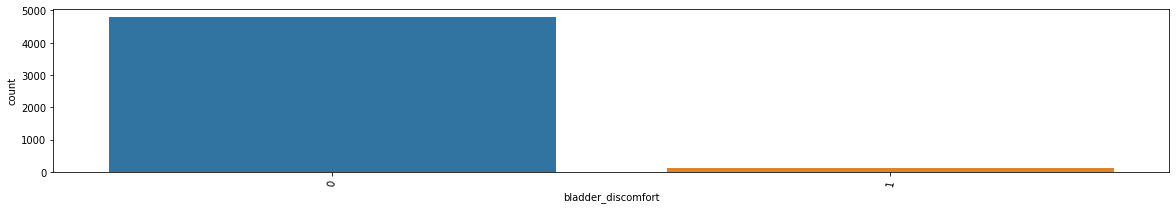

foul_smell_of urine


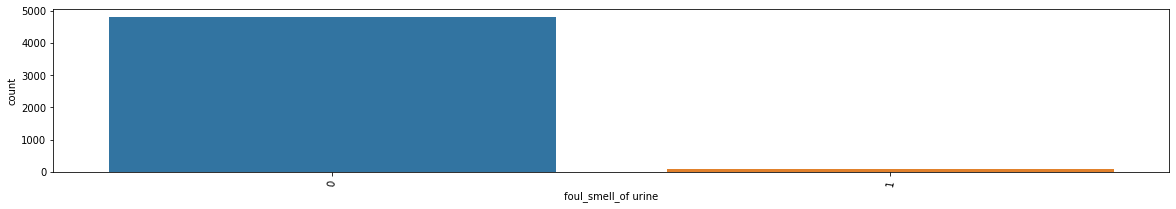

continuous_feel_of_urine


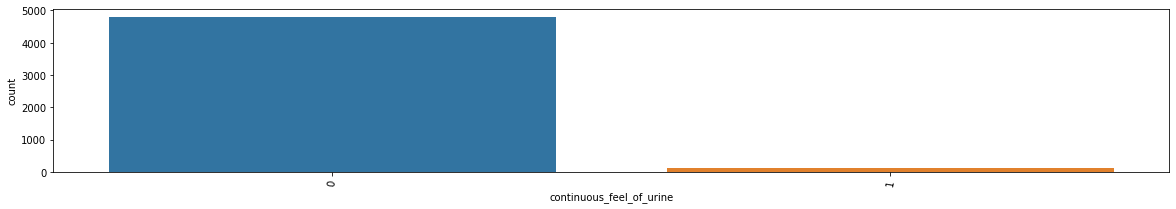

passage_of_gases


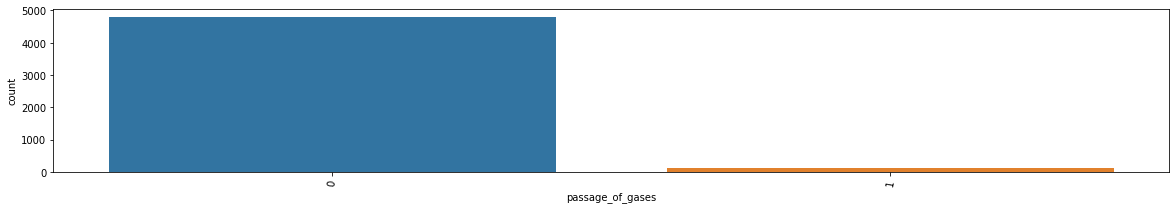

internal_itching


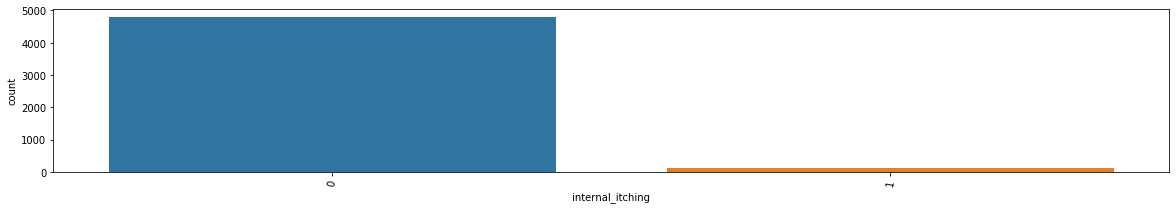

toxic_look_(typhos)


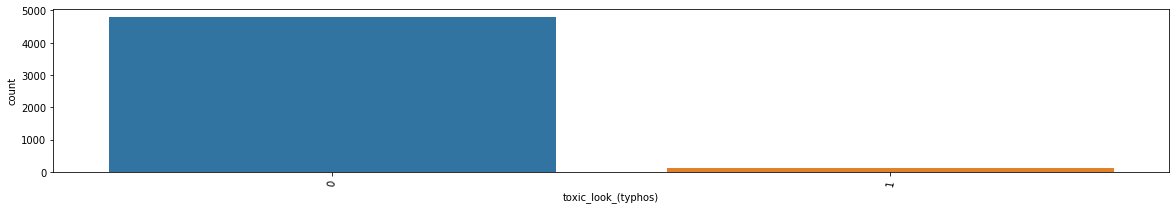

depression


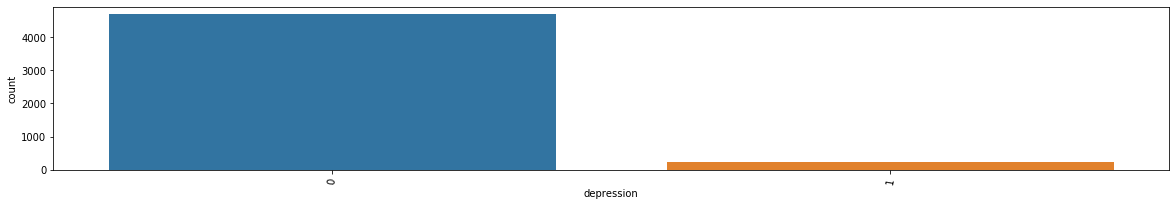

irritability


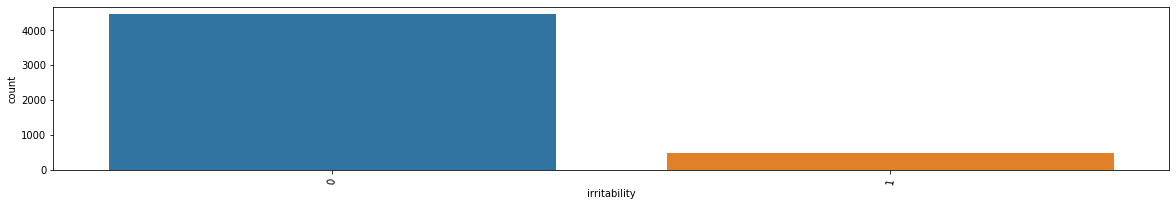

muscle_pain


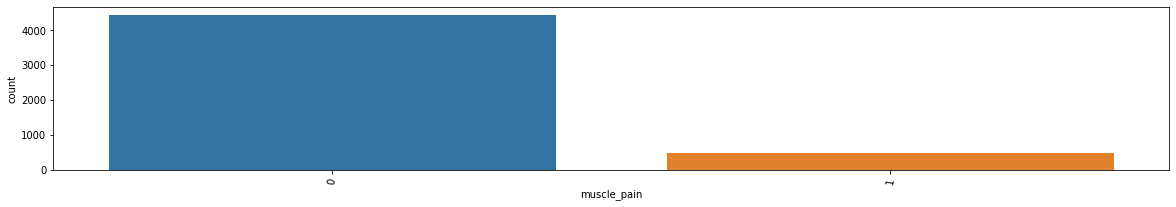

altered_sensorium


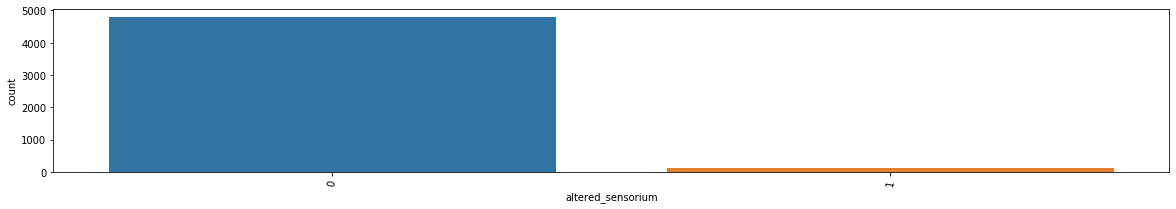

red_spots_over_body


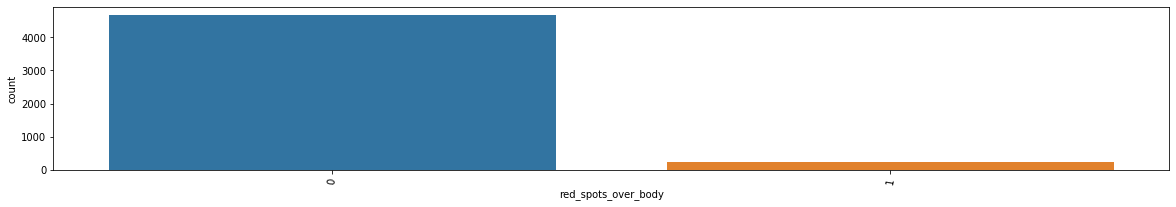

belly_pain


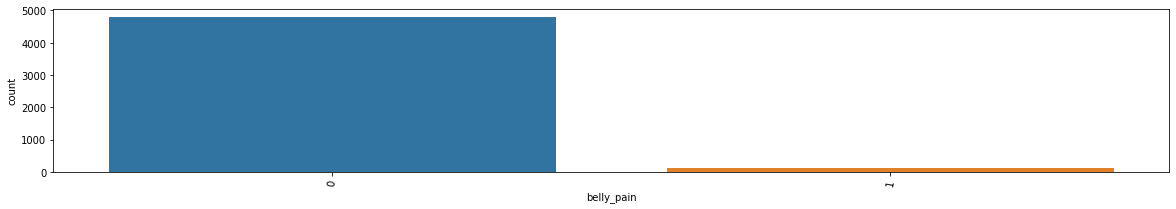

abnormal_menstruation


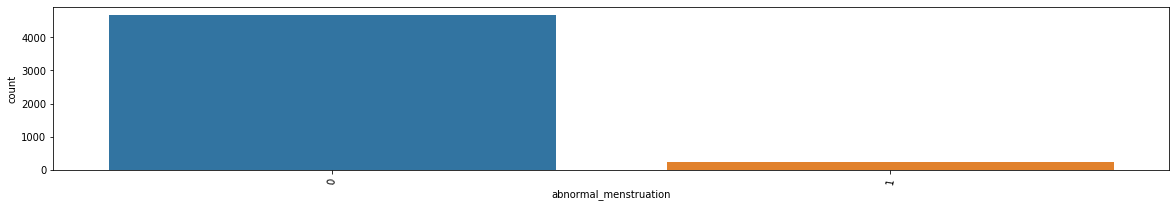

dischromic _patches


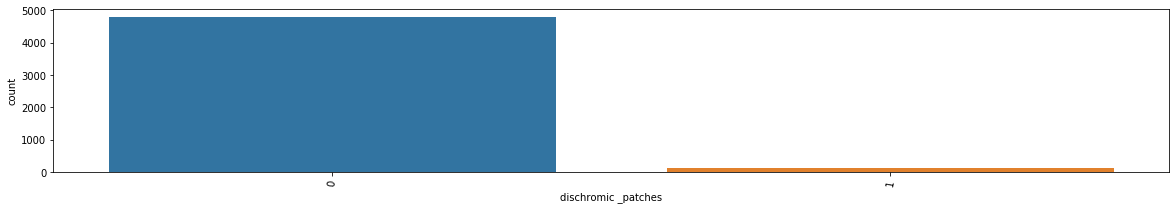

watering_from_eyes


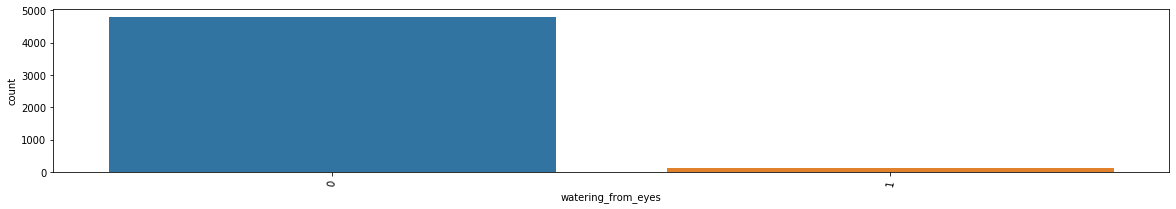

increased_appetite


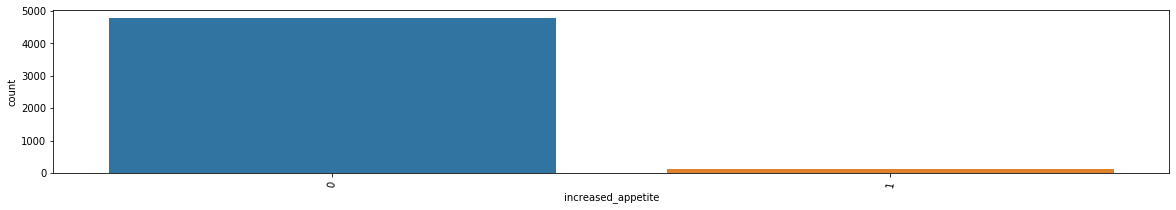

polyuria


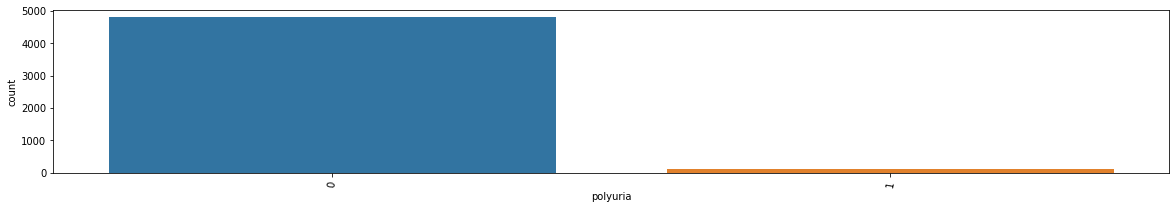

family_history


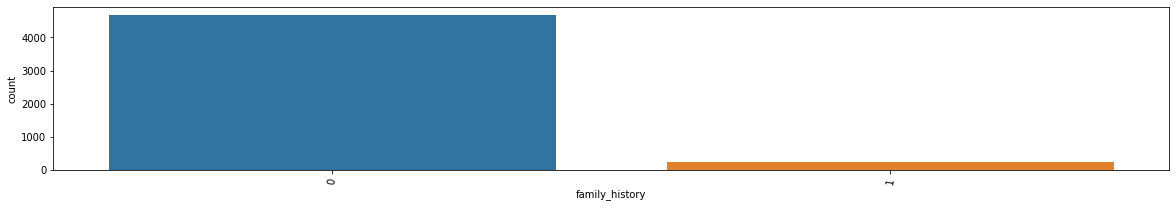

mucoid_sputum


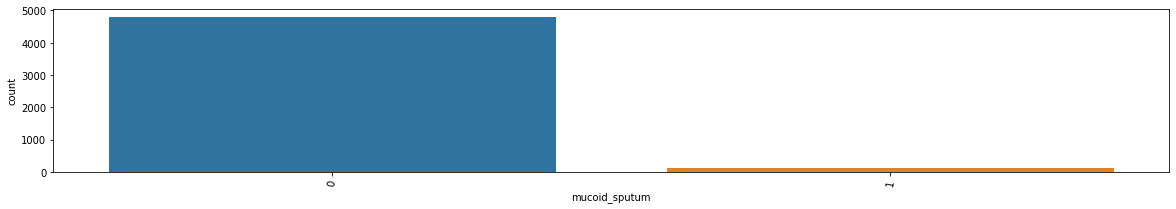

rusty_sputum


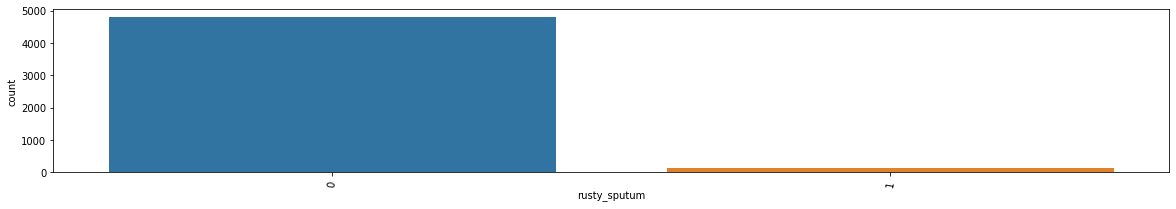

lack_of_concentration


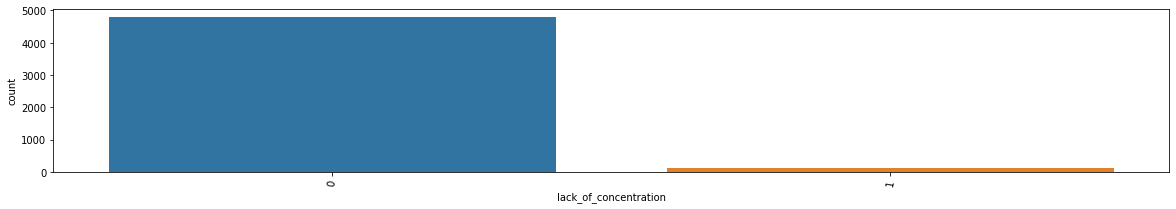

visual_disturbances


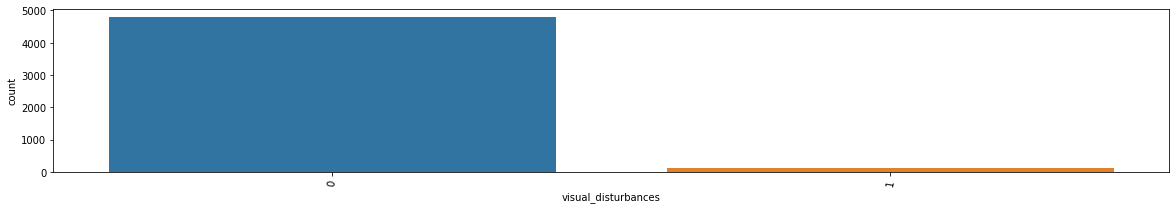

receiving_blood_transfusion


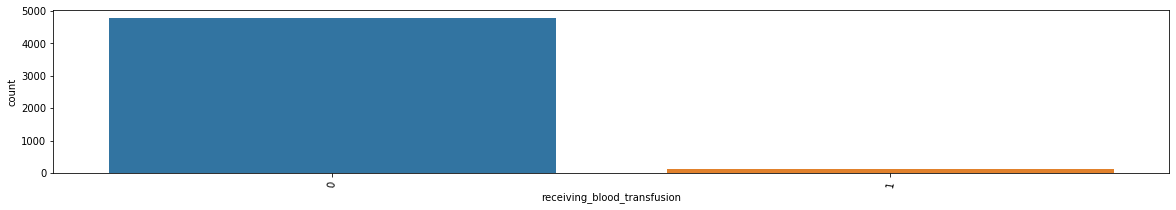

receiving_unsterile_injections


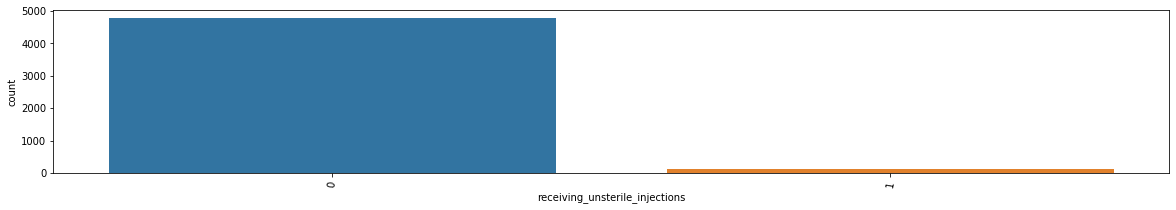

coma


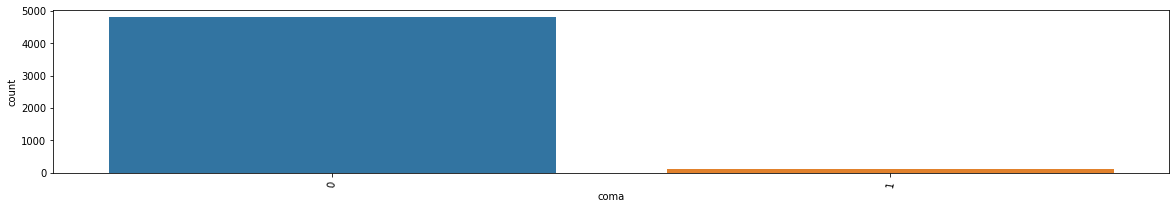

stomach_bleeding


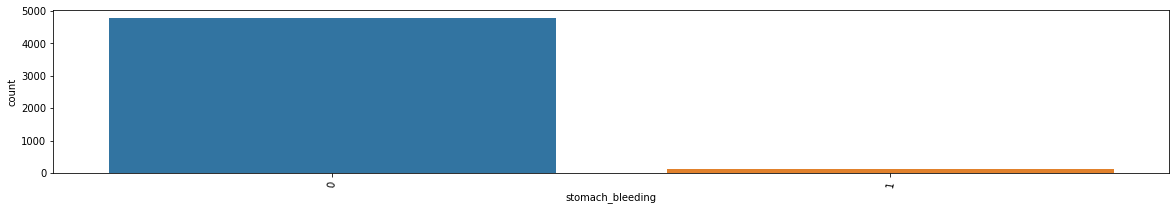

distention_of_abdomen


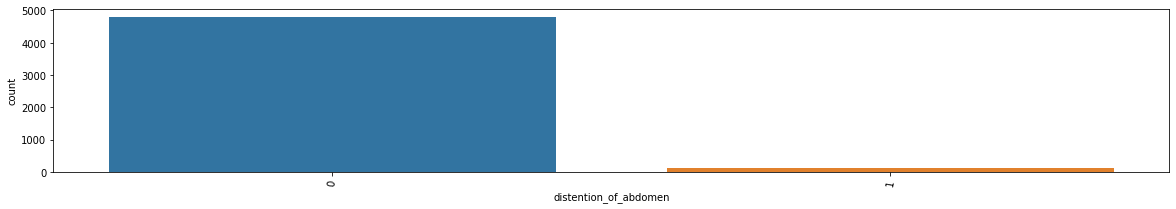

history_of_alcohol_consumption


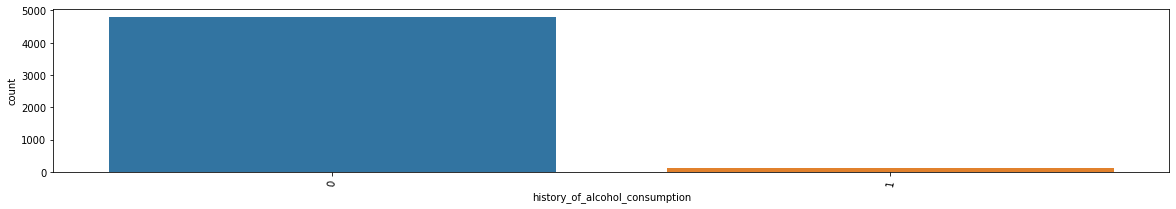

fluid_overload.1


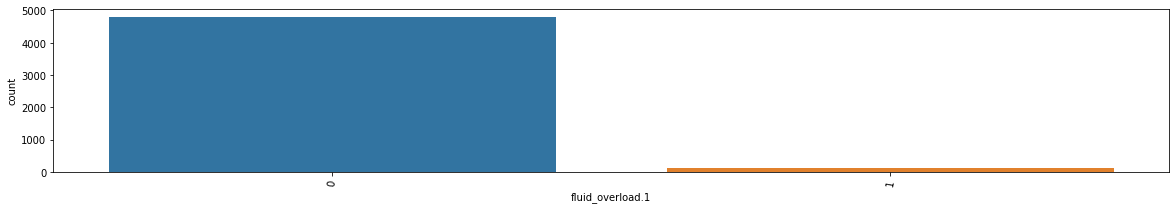

blood_in_sputum


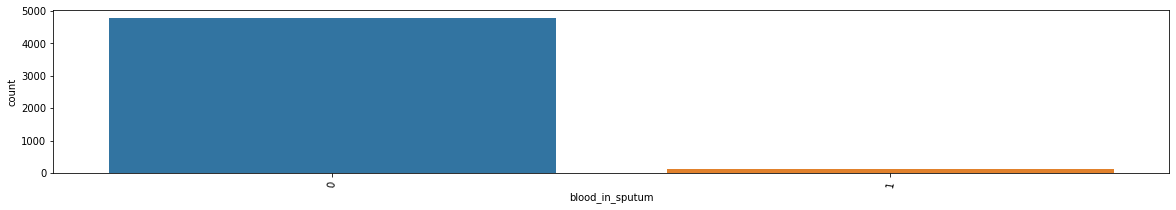

prominent_veins_on_calf


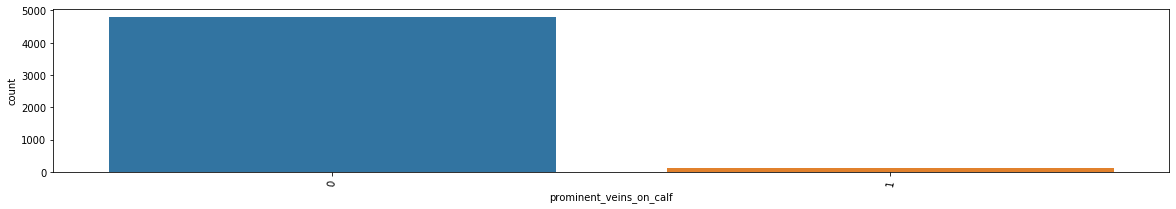

palpitations


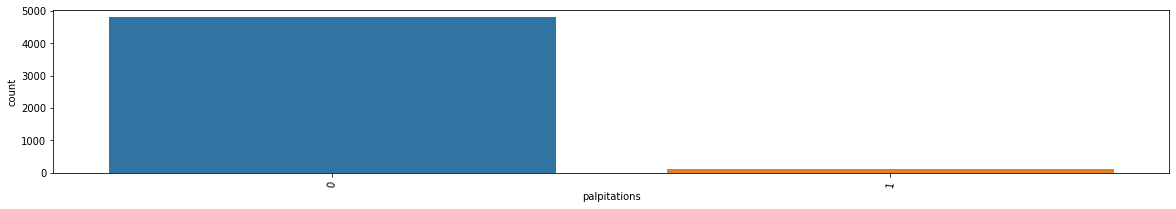

painful_walking


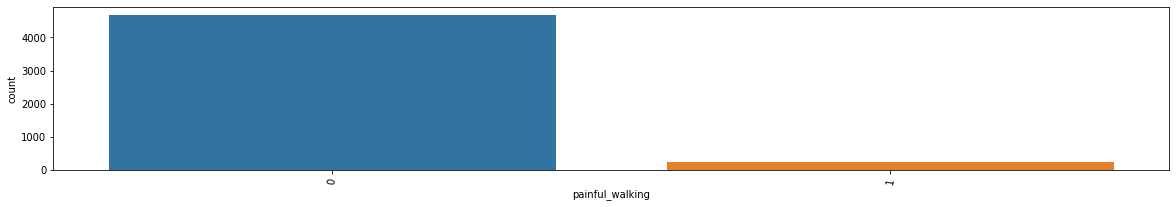

pus_filled_pimples


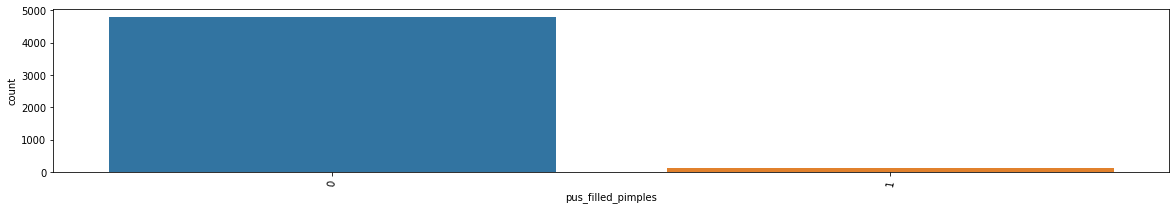

blackheads


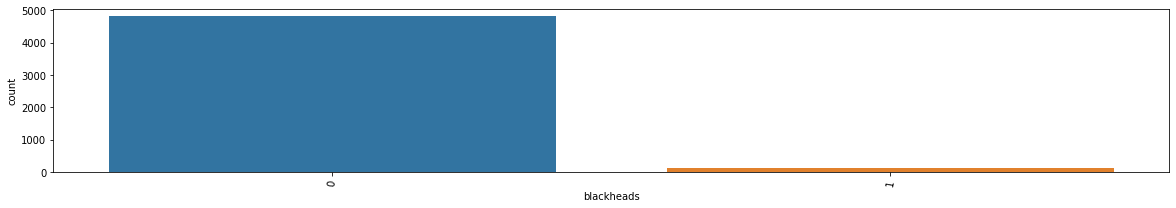

scurring


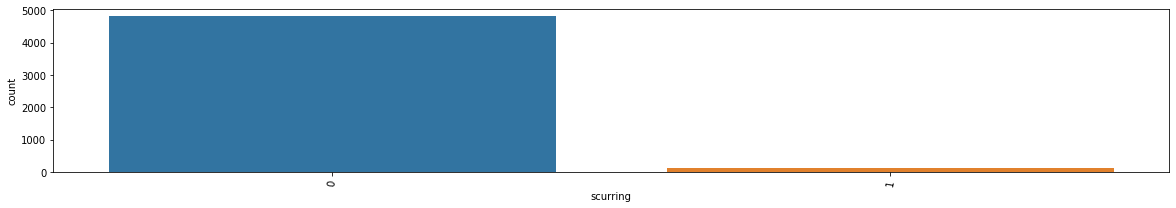

skin_peeling


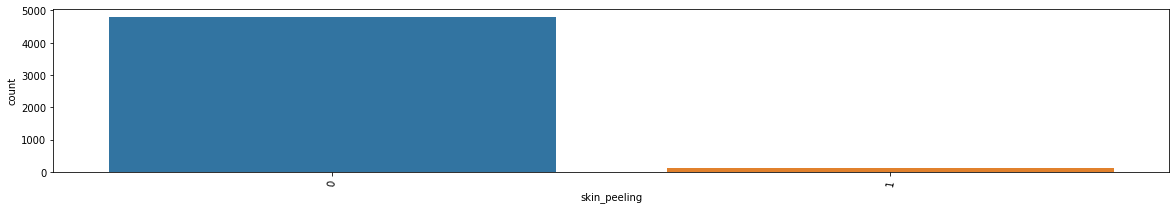

silver_like_dusting


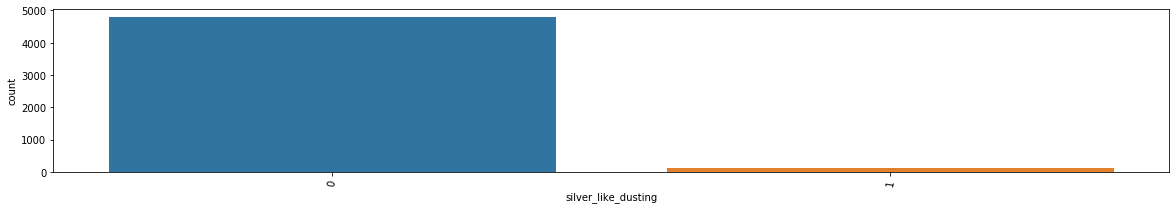

small_dents_in_nails


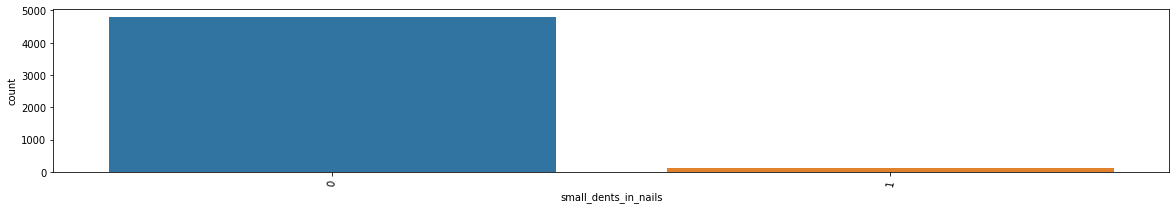

inflammatory_nails


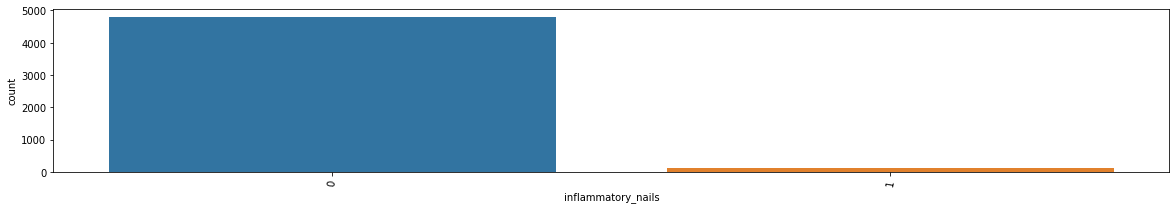

blister


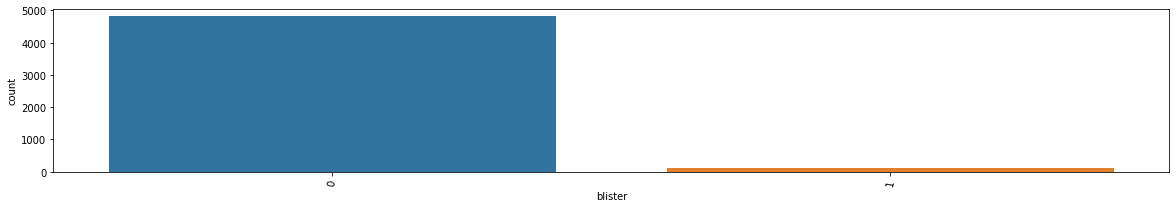

red_sore_around_nose


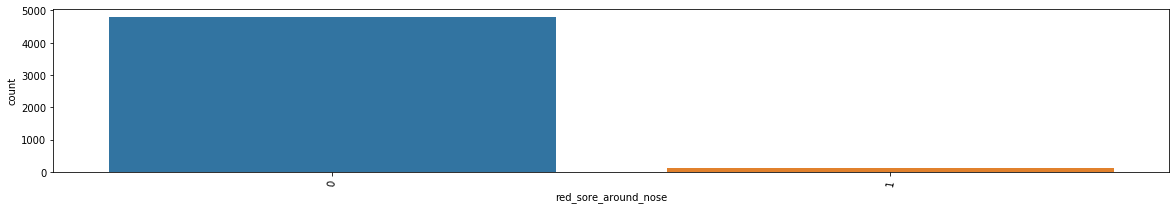

yellow_crust_ooze


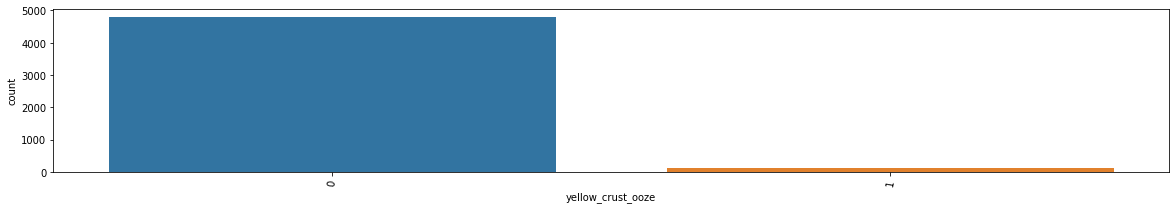

prognosis


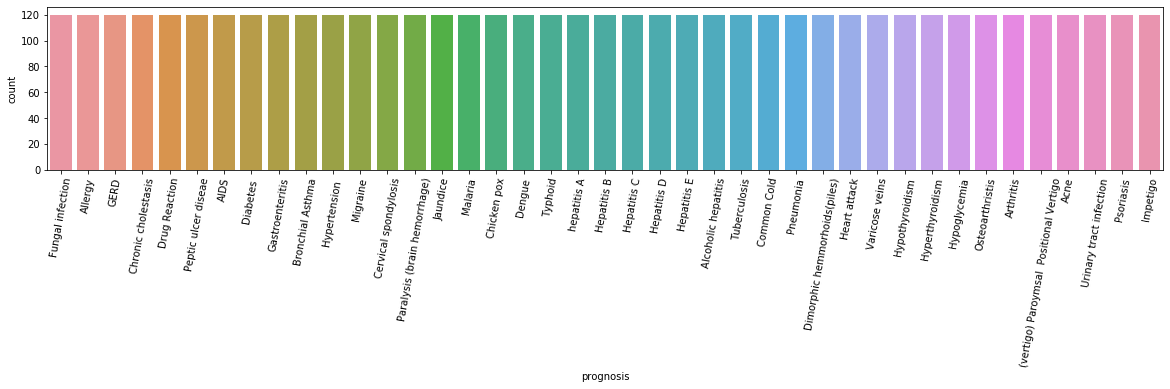

In [10]:
for cName in df.columns:
    print(cName)
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xticks(rotation=80)
    sns.countplot(df[cName])
    df[cName].value_counts()
    plt.show()

In [11]:
df["sum"] = df.sum(axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,4
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,3
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,3
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,3
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,3


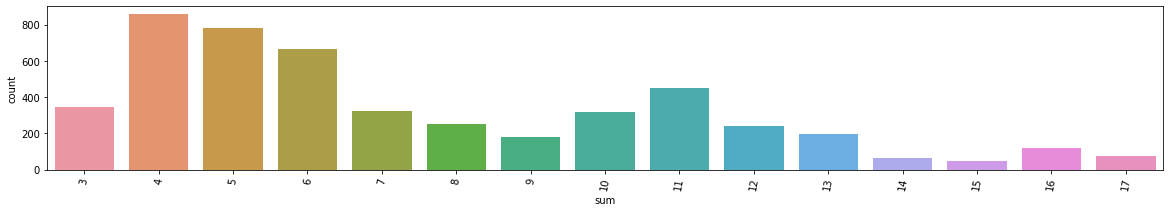

In [12]:
plt.xticks(rotation=80)
sns.countplot(df['sum'])
df['sum'].value_counts()
plt.show()

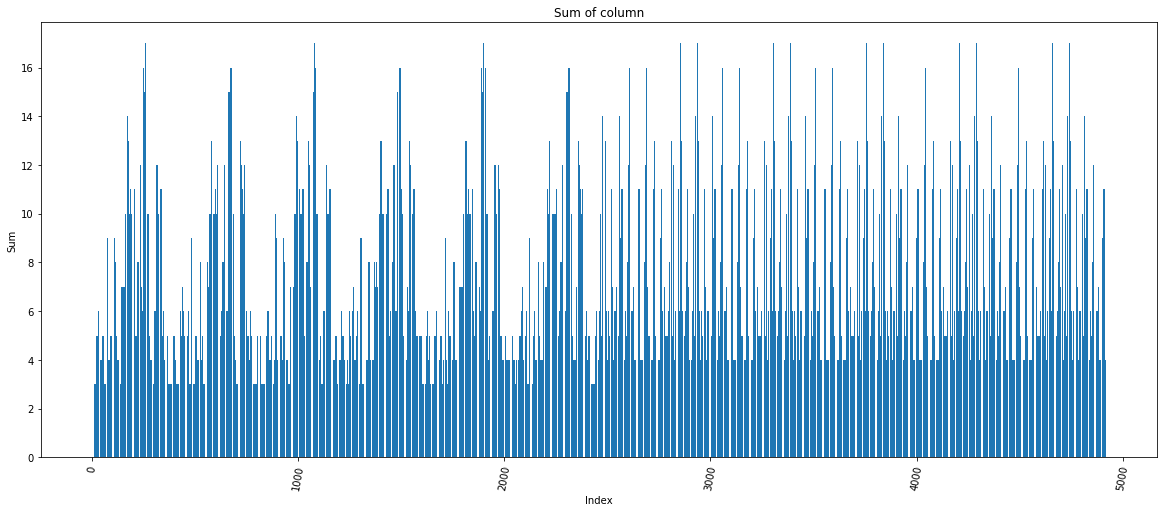

In [13]:
fig = plt.figure(figsize = (20, 8))
 
# creating the bar plot
plt.bar(range(len(df['prognosis'])), df['sum']) # , color ='maroon', width = 0.4
plt.xticks(rotation=80)
plt.xlabel("Index")
plt.ylabel("Sum")
plt.title("Sum of column")
plt.show()

In [17]:
print(list(df.columns), len(list(df.columns)))

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [18]:
# Drop unwanted columns
df = df.drop(['sum'], axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [38]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['class_prognosis'] = le.fit_transform(df['prognosis'])
df.head()

KeyError: 'prognosis'

In [20]:
# Drop unwanted columns
df = df.drop(['prognosis'], axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [21]:
df['class_prognosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [22]:
df['class_prognosis'].value_counts()

39    120
33    120
25    120
21    120
17    120
13    120
9     120
5     120
1     120
40    120
36    120
32    120
28    120
24    120
20    120
16    120
12    120
8     120
4     120
29    120
37    120
35    120
2     120
31    120
27    120
23    120
19    120
15    120
11    120
7     120
3     120
38    120
34    120
30    120
26    120
22    120
18    120
14    120
10    120
6     120
0     120
Name: class_prognosis, dtype: int64

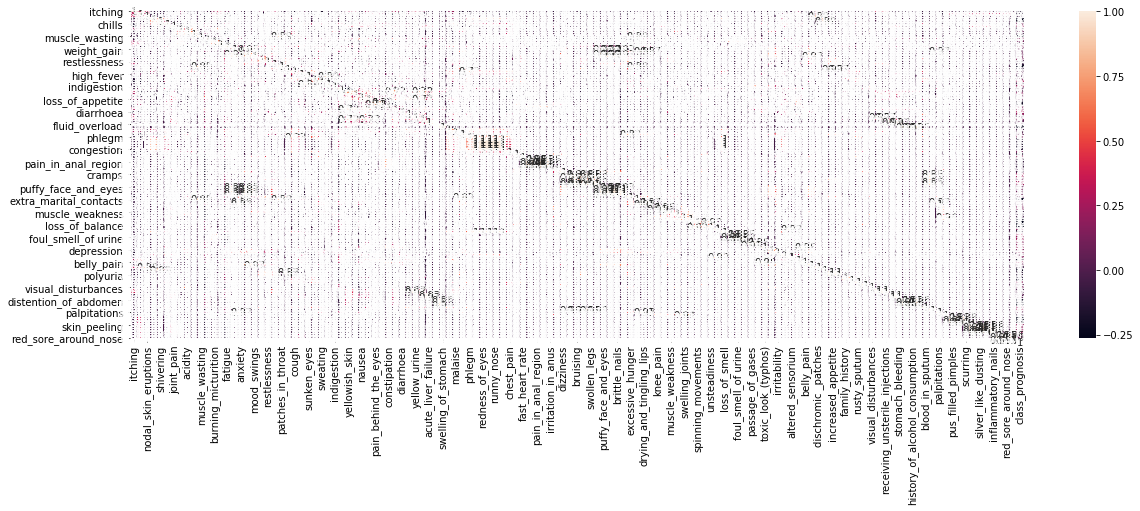

In [25]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.heatmap(corr, annot=True)
# corr

In [24]:
round(corr,2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,class_prognosis
itching,1.00,0.32,0.33,-0.09,-0.06,-0.18,-0.16,0.20,-0.09,-0.06,...,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.15
skin_rash,0.32,1.00,0.30,-0.09,-0.07,-0.03,0.17,0.16,-0.09,-0.07,...,0.32,0.32,0.33,0.33,0.33,0.33,0.33,0.33,0.33,-0.15
nodal_skin_eruptions,0.33,0.30,1.00,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.06
continuous_sneezing,-0.09,-0.09,-0.03,1.00,0.61,0.45,-0.09,-0.05,-0.05,-0.03,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.24
shivering,-0.06,-0.07,-0.02,0.61,1.00,0.30,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,0.36,-0.03,-0.03,-0.02,...,-0.02,-0.02,0.95,0.95,0.95,1.00,-0.02,-0.02,-0.02,0.20
blister,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,1.00,0.95,0.95,0.09
red_sore_around_nose,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.95,1.00,0.95,0.09
yellow_crust_ooze,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.95,0.95,1.00,0.09


In [ ]:
# !pip install pycaret

# !pip uninstall scikit-learn -y
# !pip install scikit-learn==0.24

In [26]:
df = pd.read_csv('df.csv')
df.shape

(4920, 133)

In [27]:
df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [28]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'class_prognosis') # , train_size = 0.8

,Description,Value
0,session_id,2579
1,Target,class_prognosis
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4920, 133)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,132
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare model
# best = compare_models()

In [30]:
# Create Model
lr_Classifier = create_model('lr', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [39]:
import random

input_list = []
for i in range(117):
    input_list.append(random.randint(0, 1))

In [40]:
len(input_list)

117

In [41]:
y_pred2 = lr_Classifier.predict(np.array([input_list]))
y_pred2

array([16.], dtype=float32)

In [42]:
le.inverse_transform(y_pred2)[0]

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import pickle

# save the model to disk
filename = 'lr_Classifier.pkl'
pickle.dump(lr_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
knn_Classifier = create_model('knn')

In [ ]:
y_pred2 = knn_Classifier.predict(np.array([input_list]))
y_pred2

In [ ]:
le.inverse_transform(y_pred2)[0]

In [ ]:
# save the model to disk
filename = 'knn_Classifier.pkl'
pickle.dump(knn_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
dt_Classifier = create_model('dt')

In [ ]:
y_pred2 = dt_Classifier.predict(np.array([input_list]))
y_pred2

In [ ]:
le.inverse_transform(y_pred2)[0]

In [ ]:
# save the model to disk
filename = 'dt_Classifier.pkl'
pickle.dump(dt_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
rf_Classifier = create_model('rf')

y_pred2 = rf_Classifier.predict(np.array([input_list]))
print(y_pred2, le.inverse_transform(y_pred2)[0])

# save the model to disk
filename = 'rf_Classifier.pkl'
pickle.dump(rf_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
gbc_Classifier = create_model('gbc')

y_pred2 = gbc_Classifier.predict(np.array([input_list]))
print(y_pred2, le.inverse_transform(y_pred2)[0])

# save the model to disk
filename = 'gbc_Classifier.pkl'
pickle.dump(gbc_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
xgboost_Classifier = create_model('xgboost')

y_pred2 = xgboost_Classifier.predict(np.array([input_list]))
print(y_pred2, le.inverse_transform(y_pred2)[0])

# save the model to disk
filename = 'xgboost_Classifier.pkl'
pickle.dump(xgboost_Classifier, open(filename, 'wb'))


In [ ]:
# Create Model
nb_Classifier = create_model('nb')

y_pred2 = nb_Classifier.predict(np.array([input_list]))
print(y_pred2, le.inverse_transform(y_pred2)[0])

# save the model to disk
filename = 'nb_Classifier.pkl'
pickle.dump(nb_Classifier, open(filename, 'wb'))


In [45]:
input_list1, input_list2, input_list3 = [],[],[]
for i in range(117):
    input_list1.append(random.randint(0, 1))
    input_list2.append(random.randint(0, 1))
    input_list3.append(random.randint(0, 1))    

In [46]:
import pickle


# load model
lr_model = pickle.load(open('Models//lr_Classifier.pkl', 'rb')) 
dt_model = pickle.load(open('Models//dt_Classifier.pkl', 'rb')) 
gbc_model = pickle.load(open('Models//gbc_Classifier.pkl', 'rb')) 
knn_model = pickle.load(open('Models//knn_Classifier.pkl', 'rb')) 
nb_model = pickle.load(open('Models//nb_Classifier.pkl', 'rb')) 
rf_model = pickle.load(open('Models//rf_Classifier.pkl', 'rb')) 
xgboost_model = pickle.load(open('Models//xgboost_Classifier.pkl', 'rb')) 


In [47]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3757, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3757, splitter='best')

In [ ]:
gbc_model

In [48]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3757, verbose=0,
                       warm_start=False)

In [ ]:
xgboost_model

In [ ]:
len(df.columns)

In [ ]:
for i in range(len(df.columns)) :
    print(i, df.columns[i])

In [ ]:
df.to_csv('df.csv',index=False)

In [ ]:
df.shape

In [ ]:
len(df.columns) , len(set(df.columns))